# <center>Projeto ATD</center>
## <center>2ºsemestre 2020/2021</center>
### <center>FCTUC - DEI</center>
### Membros:
* Joel Oliveira - 2019227468
* Tomás Mendes - 2019232272


#### Livrarias utilizadas neste projeto:
* numpy
* pandas
* matplotlib
* scipy
* sklearn
* seaborn

#### Todas estas livrarias podem ser instaladas com recurso ao pip, na linha de comandos, ou ao adicionados a um enviroment conda.
Com o pip: ```pip install numpy pandas matplotlib scipy sklearn seaborn```

#### <u>Nota</u>: por uma questão de simplificação e diminuição de código no notebook, todas as funções usadas encontram-se no ficheiro functions.py e todos os dados referentes aos vários sinais do nosso dataset, encontram-se no ficheiro data.py


In [3]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal
import scipy as sy
from numpy.fft import fft, fftshift
import seaborn as sns
import matplotlib
from sklearn.metrics import confusion_matrix
from IPython.display import Markdown as md

from data import *
from functions import *

sns.set_style("whitegrid")
sns.set_palette("deep")

#### Leitura do ficheiro 'labels.txt'
#### A Leitura do ficheiro 'activity_labels.txt' é realizada no ficheiro 'data.py', e os dados são importados desse ficheiro

In [4]:
# Filtrar dados do ficheiro para serem recebidos dados dos 8 primeiros voluntários
intervalos = np.array(list(filter(lambda x: x[0]<=8, np.loadtxt('labels.txt', dtype = int))))

## Verificação dos dados presentes no DataSet, através do método 'info()' da <i>DataFrame</i> do módulo <i>Pandas</i>. 

Esta função devolve informações sobre a informação presente na <i>DataFrame</i>. É devolvida uma <i>string</i> com:
* quantidade de valores nulos e não nulos
* tipo de dados em cada coluna

Assim, é possível verificar que o <i>DataSet</i> está bastante completo, sem falhas de informação e o tipo de dados presentes, do tipo <i>Float</i> neste caso.


In [5]:
for i in range(len(users)):
    print("//" + "_"*15 + f"Sujeito {i//2+1} Experiencia {i%2+1}" + "_"*15 + "\\\\", end='\n\n')
    print(users[i].info())
    print()

//_______________Sujeito 1 Experiencia 1_______________\\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20598 entries, 0 to 20597
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           20598 non-null  float64
 1   Y           20598 non-null  float64
 2   Z           20598 non-null  float64
 3   Time (min)  20598 non-null  float64
dtypes: float64(4)
memory usage: 643.8 KB
None

//_______________Sujeito 1 Experiencia 2_______________\\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19286 entries, 0 to 19285
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           19286 non-null  float64
 1   Y           19286 non-null  float64
 2   Z           19286 non-null  float64
 3   Time (min)  19286 non-null  float64
dtypes: float64(4)
memory usage: 602.8 KB
None

//_______________Sujeito 2 Experiencia 1_______________\\

<class 'pandas.core

## Atividades presentes nos <i>Datasets<i>
### Atividades Dinâmicas:
* WALKING
* WALKING_UPSTAIRS
* WALKING_DOWNSTAIRS

### Atividades Estáticas:
* SITTING
* STANDING
* LAYING

### Atividades de Transição:
* STAND_TO_SIT
* SIT_TO_STAND
* SIT_TO_LIE
* LIE_TO_SIT
* STAND_TO_LIE
* LIE_TO_STAND

## 2. Visualização e identificação das atividades do sinal de cada experiência

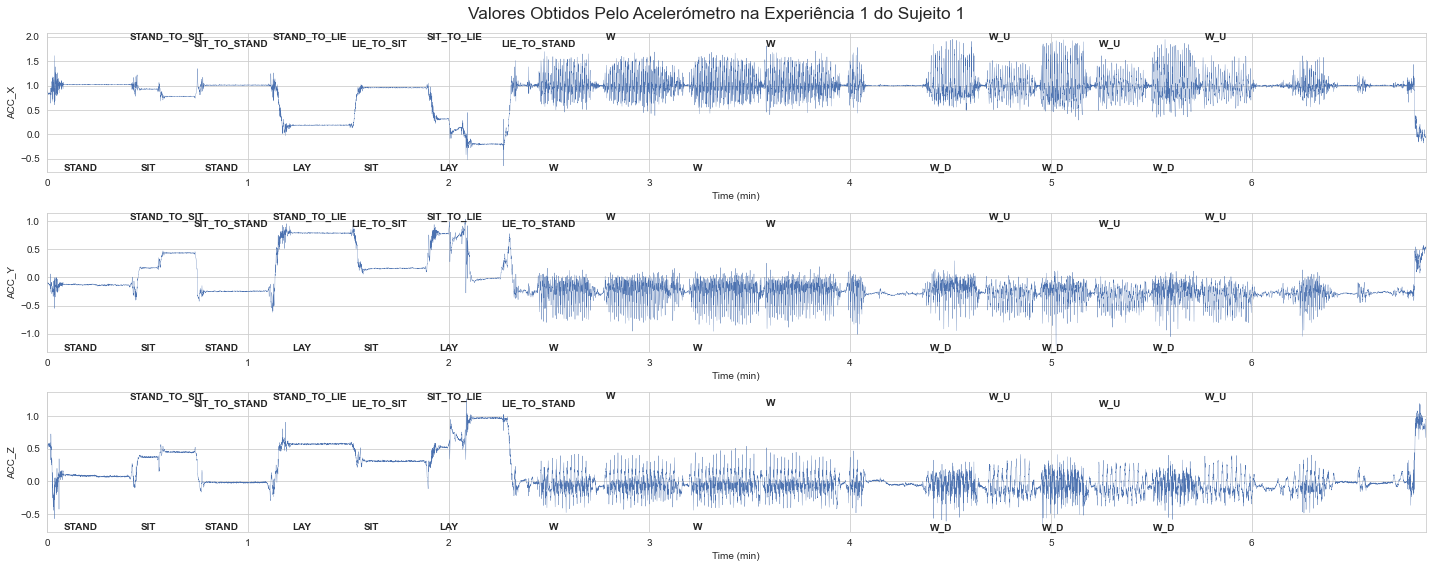

In [6]:
user = get_user(1,1)
coordenadas = np.array(list(map(lambda y: [y[-3], y[-2]], filter(lambda x: x[0] == 1 and x[1] == 1, intervalos))))
upcoords = list(map(lambda x: x[1], coordenadas[1::2]))
downcoords = list(map(lambda x: x[1], coordenadas[::2]))

uplabels = list(map(lambda x: x[0], coordenadas[1::2]))
downlabels = list(map(lambda x: x[0], coordenadas[::2]))

plot_with_labels(upcoords, downcoords, uplabels, downlabels, user, 0)

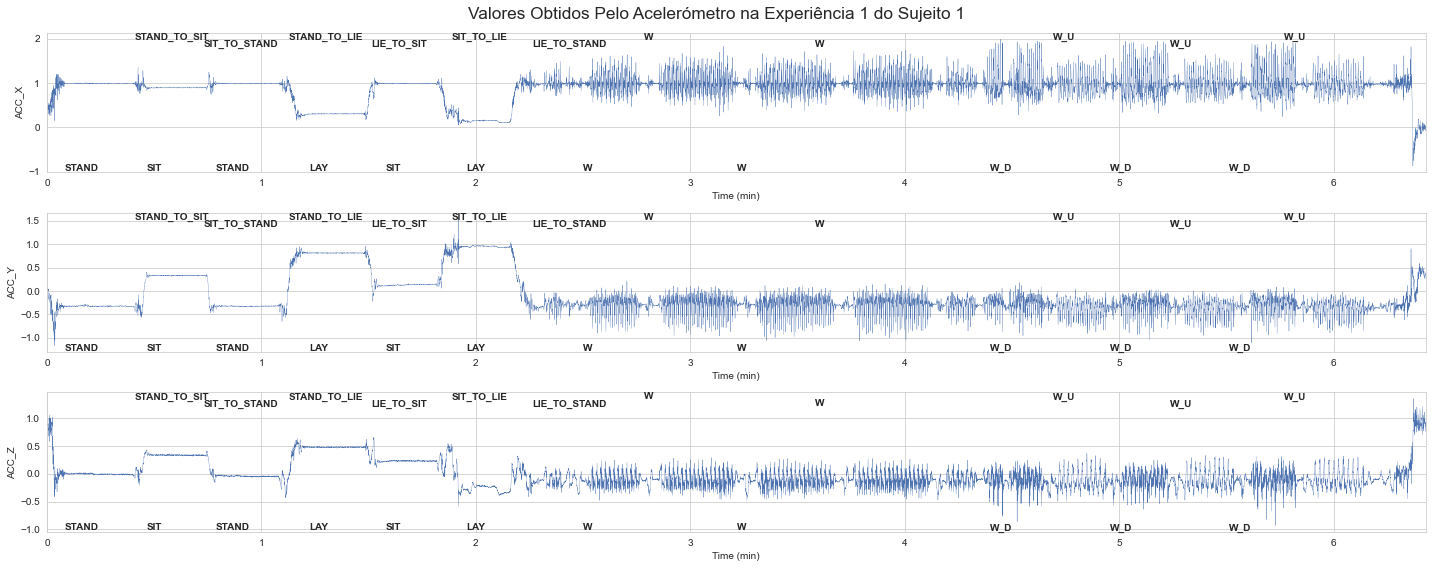

In [7]:
user = get_user(1,2)
coordenadas = np.array(list(map(lambda y: [y[-3], y[-2]], filter(lambda x: x[0] == 1 and x[1] == 1, intervalos))))
upcoords = list(map(lambda x: x[1], coordenadas[1::2]))
downcoords = list(map(lambda x: x[1], coordenadas[::2]))

uplabels = list(map(lambda x: x[0], coordenadas[1::2]))
downlabels = list(map(lambda x: x[0], coordenadas[::2]))

plot_with_labels(upcoords, downcoords, uplabels, downlabels, user, 0)

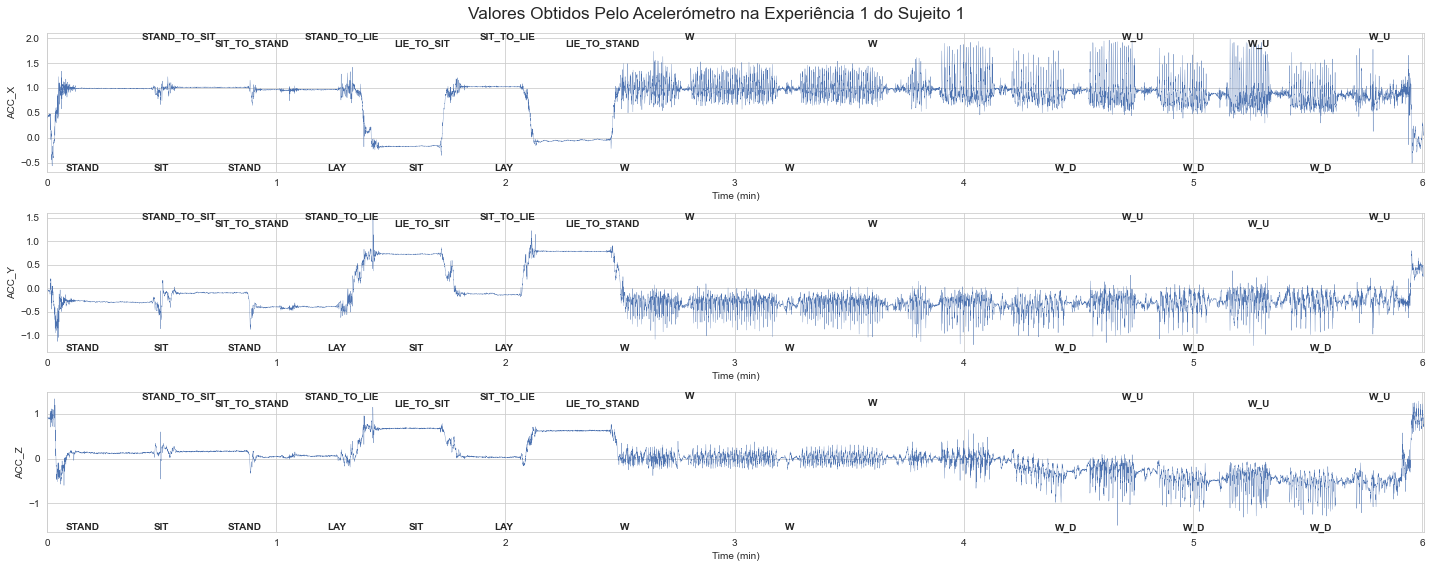

In [8]:
user = get_user(2,3)
coordenadas = np.array(list(map(lambda y: [y[-3], y[-2]], filter(lambda x: x[0] == 1 and x[1] == 1, intervalos))))
upcoords = list(map(lambda x: x[1], coordenadas[1::2]))
downcoords = list(map(lambda x: x[1], coordenadas[::2]))

uplabels = list(map(lambda x: x[0], coordenadas[1::2]))
downlabels = list(map(lambda x: x[0], coordenadas[::2]))

plot_with_labels(upcoords, downcoords, uplabels, downlabels, user, 0)

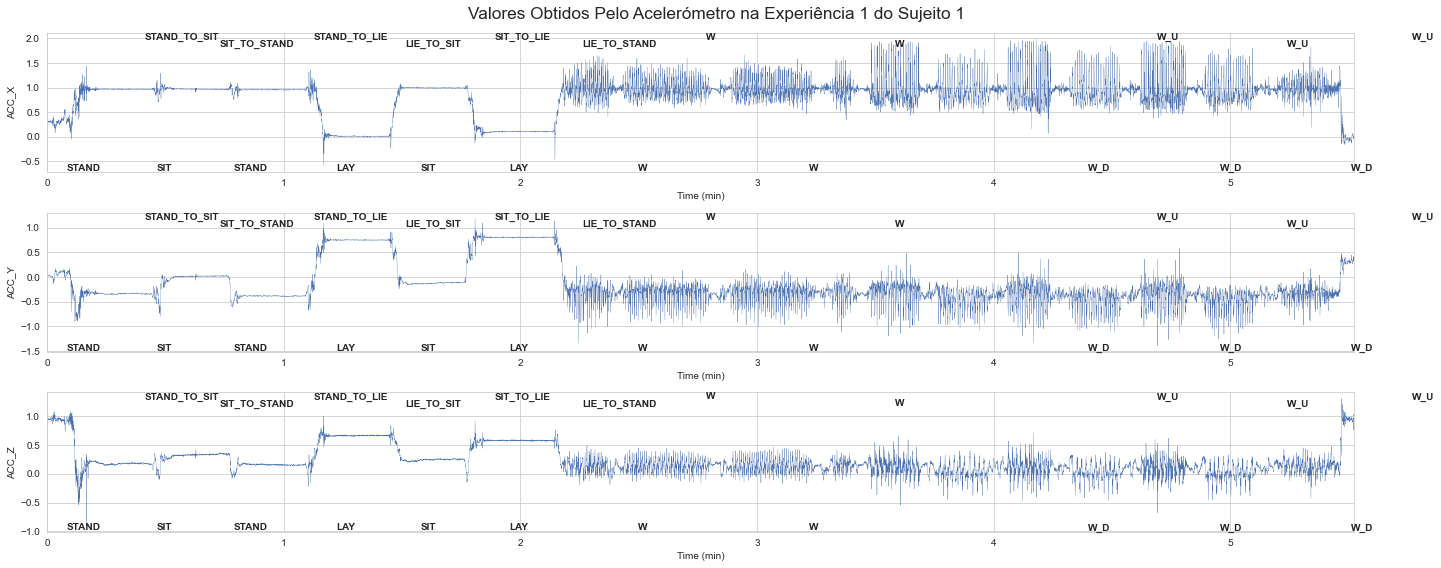

In [9]:
user = get_user(2,4)
coordenadas = np.array(list(map(lambda y: [y[-3], y[-2]], filter(lambda x: x[0] == 1 and x[1] == 1, intervalos))))
upcoords = list(map(lambda x: x[1], coordenadas[1::2]))
downcoords = list(map(lambda x: x[1], coordenadas[::2]))

uplabels = list(map(lambda x: x[0], coordenadas[1::2]))
downlabels = list(map(lambda x: x[0], coordenadas[::2]))

plot_with_labels(upcoords, downcoords, uplabels, downlabels, user, 0)

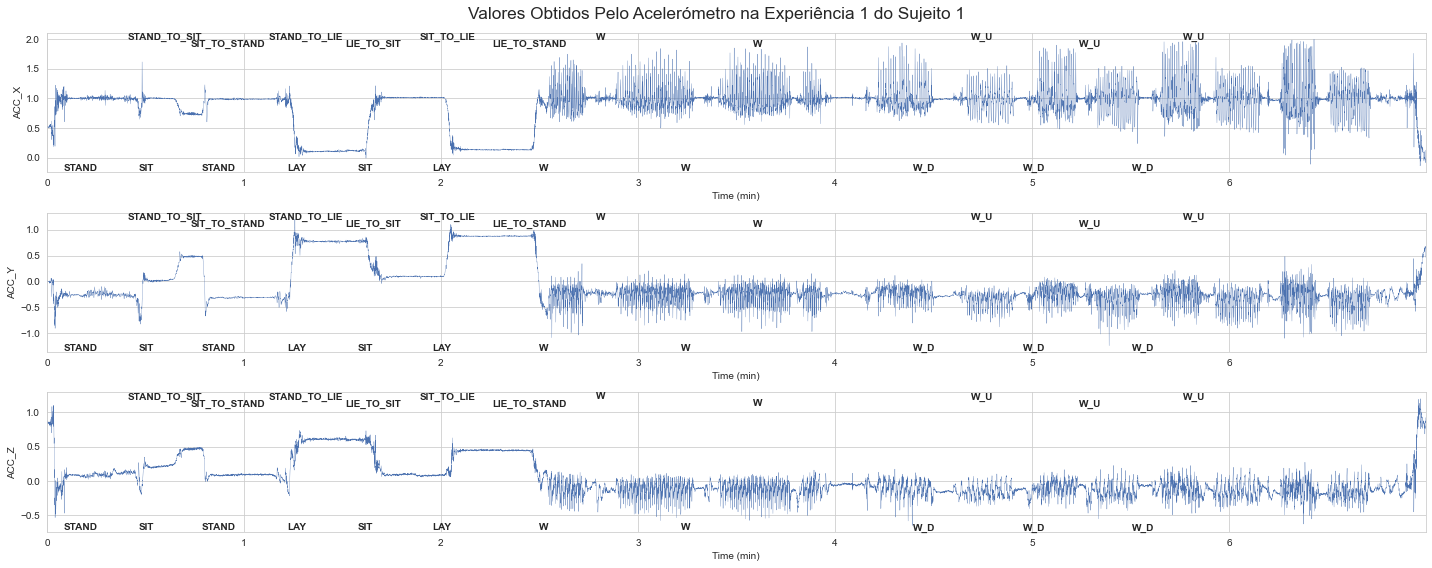

In [10]:
user = get_user(3,5)
coordenadas = np.array(list(map(lambda y: [y[-3], y[-2]], filter(lambda x: x[0] == 1 and x[1] == 1, intervalos))))
upcoords = list(map(lambda x: x[1], coordenadas[1::2]))
downcoords = list(map(lambda x: x[1], coordenadas[::2]))

uplabels = list(map(lambda x: x[0], coordenadas[1::2]))
downlabels = list(map(lambda x: x[0], coordenadas[::2]))

plot_with_labels(upcoords, downcoords, uplabels, downlabels, user, 0)

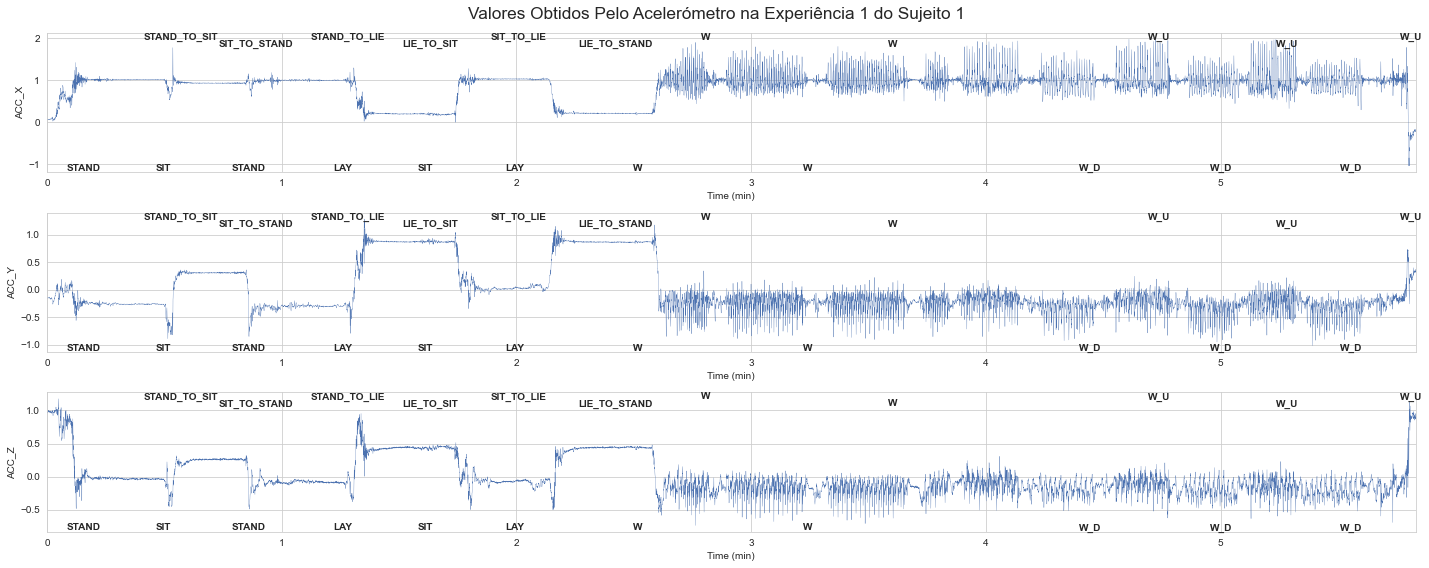

In [11]:
user = get_user(3,6)
coordenadas = np.array(list(map(lambda y: [y[-3], y[-2]], filter(lambda x: x[0] == 1 and x[1] == 1, intervalos))))
upcoords = list(map(lambda x: x[1], coordenadas[1::2]))
downcoords = list(map(lambda x: x[1], coordenadas[::2]))

uplabels = list(map(lambda x: x[0], coordenadas[1::2]))
downlabels = list(map(lambda x: x[0], coordenadas[::2]))

plot_with_labels(upcoords, downcoords, uplabels, downlabels, user, 0)

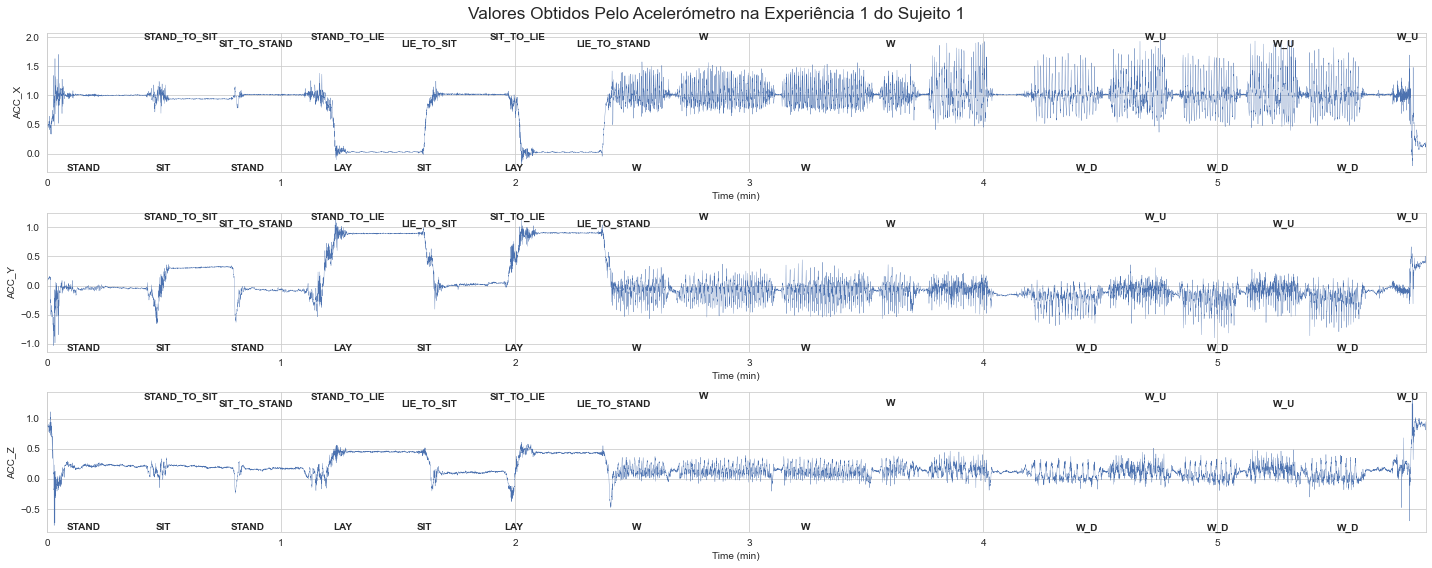

In [12]:
user = get_user(4,7)
coordenadas = np.array(list(map(lambda y: [y[-3], y[-2]], filter(lambda x: x[0] == 1 and x[1] == 1, intervalos))))
upcoords = list(map(lambda x: x[1], coordenadas[1::2]))
downcoords = list(map(lambda x: x[1], coordenadas[::2]))

uplabels = list(map(lambda x: x[0], coordenadas[1::2]))
downlabels = list(map(lambda x: x[0], coordenadas[::2]))

plot_with_labels(upcoords, downcoords, uplabels, downlabels, user, 0)

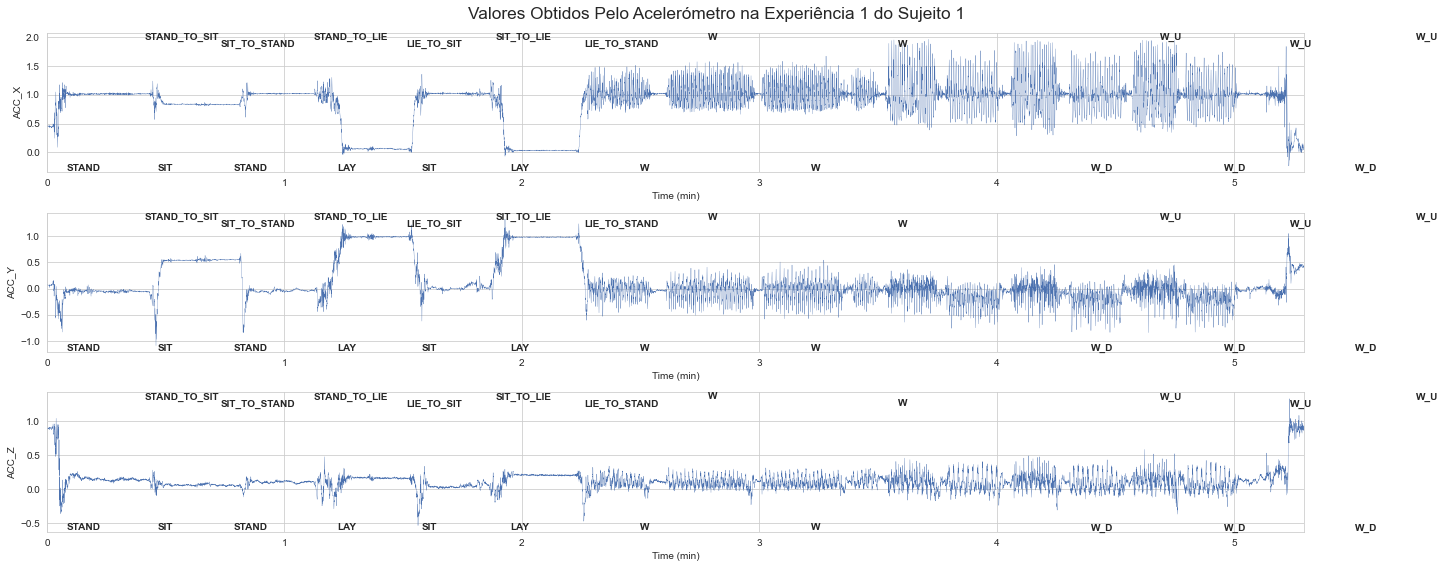

In [13]:
user = get_user(4,8)
coordenadas = np.array(list(map(lambda y: [y[-3], y[-2]], filter(lambda x: x[0] == 1 and x[1] == 1, intervalos))))
upcoords = list(map(lambda x: x[1], coordenadas[1::2]))
downcoords = list(map(lambda x: x[1], coordenadas[::2]))

uplabels = list(map(lambda x: x[0], coordenadas[1::2]))
downlabels = list(map(lambda x: x[0], coordenadas[::2]))

plot_with_labels(upcoords, downcoords, uplabels, downlabels, user, 0)

## 3. Identificação das caraterísticas principais das várias atividades

## Seleção da janela para segmentar as atividades
<p style='text-align: justify;'> Nos <i>slides</i> das <i>TP's<i> há 3 exemplos de janelas usadas para estudos de frequências associadas a sinais. Estas são a janela de <i>Blackman</i>,de <i>Hamming</i> e de <i>Hanning</i>. Na documentação do módulo <i>numpy</i>, é possível encontrar mais algumas com história. A janela de <i>Bartlett</i>, que tem a forma de um triângulo, e a janela de <i>Kaiser</i>, que tem como parâmetro um $\beta$ que na prática serve como fator de equilibrio tempo-frequência na análise do sinal.
    
Para o caso vamos testar apenas as 3 primeiras referidas.
</p>


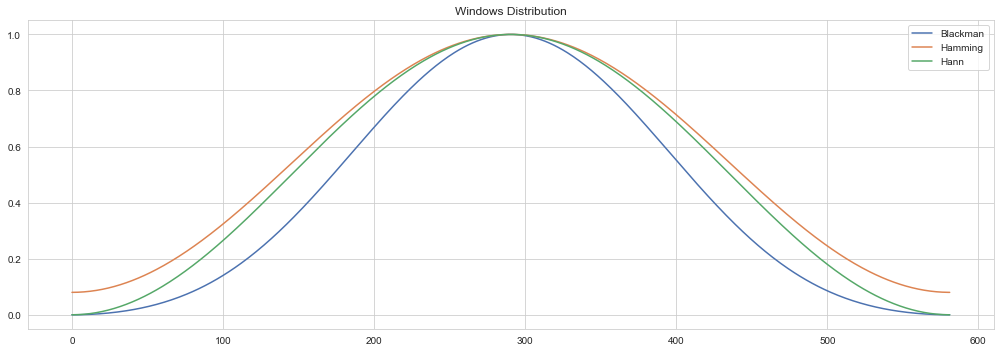

In [14]:
uteste = walks_user1_1[0]
size = len(uteste)
bwindow = signal.windows.blackman(size)
hmwindow = np.hamming(size)
hnwindow = signal.windows.hann(size)
beta = 7.5
kwindow = signal.windows.kaiser(size, beta)
## PLOTTING 
fig = plt.figure(figsize=(14,5))

plt.plot(bwindow, label = 'Blackman')
plt.plot(hmwindow, label = 'Hamming')
plt.plot(hnwindow, label = 'Hann')

plt.title("Windows Distribution")
plt.tick_params(axis='x')
plt.tick_params(axis='y')

plt.legend()
plt.tight_layout()

Pela documentação do <i>numpy</i> foi implementado código para fazer uma verificação visual de resposta a frequência de cada uma destas janelas 

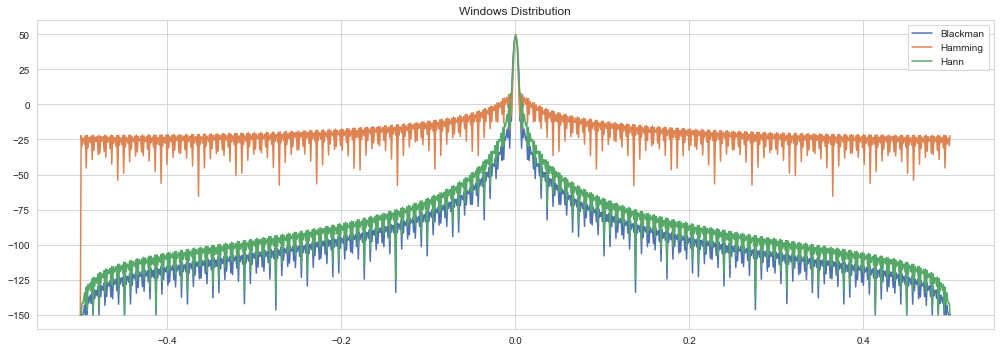

In [15]:
fbwindow = np.abs(fftshift(fft(bwindow,1024)))
fhmwindow = np.abs(fftshift(fft(hmwindow,1024)))
fhnwindow = np.abs(fftshift(fft(hnwindow,1024)))

freq = np.linspace(-0.5, 0.5, 1024)

with np.errstate(divide='ignore', invalid='ignore'):
    nfbwindow = 20*np.log10(fbwindow)
    nfhmwindow = 20* np.log10(fhmwindow)
    nfhnwindow = 20 * np.log10(fhnwindow)

nfbwindow = np.clip(nfbwindow, -150, 100)
nfhmwindow = np.clip(nfhmwindow, -150, 100)
nfhnwindow = np.clip(nfhnwindow, -150, 100)
    
fig = plt.figure(figsize=(14,5))

plt.plot(freq, nfbwindow, label = 'Blackman')
plt.plot(freq, nfhmwindow, label = 'Hamming')
plt.plot(freq, nfhnwindow, label = 'Hann')

plt.title("Windows Distribution")
plt.tick_params(axis='x')
plt.tick_params(axis='y')


plt.legend()
plt.tight_layout()

Pelos gráficos das janelas no tempo e da resposta a frequência das janelas a pensamos que a mais apropriada para o este projeto será a <i>Hanning</i>, apesar de que na prática e com testes feitos anteriormente, os resultados serem basicamente os mesmos. A janela de <i>Hanning</i>, pelo nossa pesquisa, tem uma eficiência, na computação, similar à da janela de <i>Hamming</i>. Obtém resultados piores no domínio do tempo, pois a sua janela atinge 0 nas pontas, o que pode alterar bastante o sinal original. 
No entanto, para a análise das frequências, isto pode não ser algo negativo. Isto faz com que tenhamos a certeza de que não é adicionada nenhuma frequência indesejada na transformada. Pelos fragmentos feitos das atividades, também nos parece que com a quantidade de dados em cada fragmento, o abate das pontas não seja significativo para a perda total das frequências fundamentais à análise da DFT. Para além disto, no caso da STFT, será efetuada uma sobreposição de janelas, pelo que a maioria dessas frequências abatidas, será recuperada na janela seguinte.

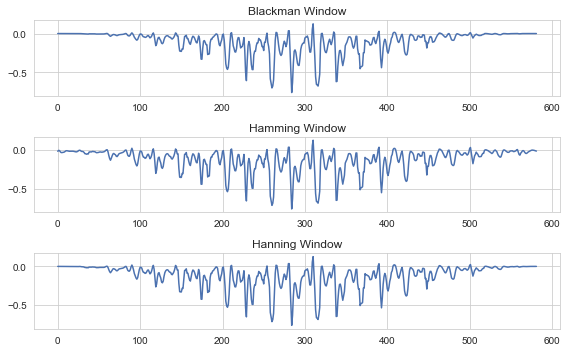

In [16]:
fig = plt.figure(figsize=(8,5))
accax = 'Y'
plt.subplot(311)
plt.plot(bwindow*uteste[accax])
plt.title("Blackman Window")
plt.tick_params(axis='x')
plt.tick_params(axis='y')



plt.subplot(312)
plt.plot(hmwindow*uteste[accax])
plt.title("Hamming Window")
plt.tick_params(axis='x')
plt.tick_params(axis='y')


plt.subplot(313)
plt.plot(hnwindow*uteste[accax])
plt.title("Hanning Window")
plt.tick_params(axis='x')
plt.tick_params(axis='y')


plt.tight_layout()

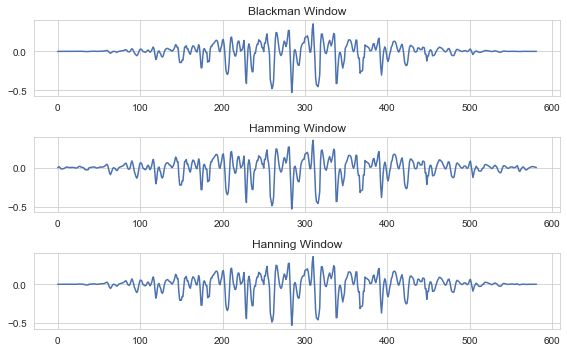

In [17]:
uteste = walks_user1_1_detrended[0]

fig = plt.figure(figsize=(8,5))
accax = 'Y'
plt.subplot(311)
plt.plot(bwindow*uteste[accax])
plt.title("Blackman Window")
plt.tick_params(axis='x')
plt.tick_params(axis='y')



plt.subplot(312)
plt.plot(hmwindow*uteste[accax])
plt.title("Hamming Window")
plt.tick_params(axis='x')
plt.tick_params(axis='y')


plt.subplot(313)
plt.plot(hnwindow*uteste[accax])
plt.title("Hanning Window")
plt.tick_params(axis='x')
plt.tick_params(axis='y')

plt.tight_layout()

Como é visível no plot dos gráficos, não efetuar um detrend aos dados pode levar a um formato indesejado do sinal, pelo que no nosso estudo, será aplicado um dentrend a cada sinal, de forma a centrá-lo no eixo y = 0. 


Pela verificação do produto das janelas com o segmento do sinal associado a atividades dinâmicas e ao mesmo sinal após um 'detrend', verifica-se que o sinal detrended obtém melhores resultados para uma melhor análise, pois fica mais simétrico em relação ao eixo central. 

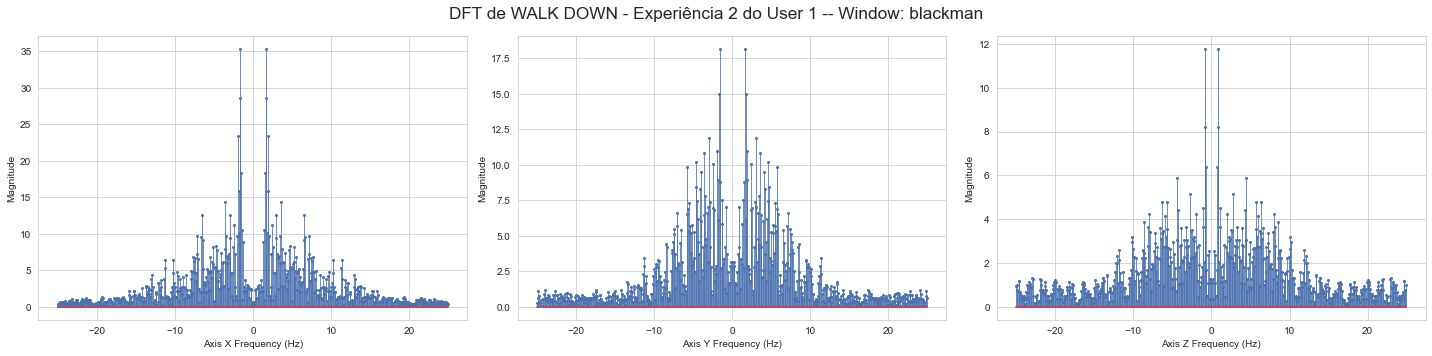

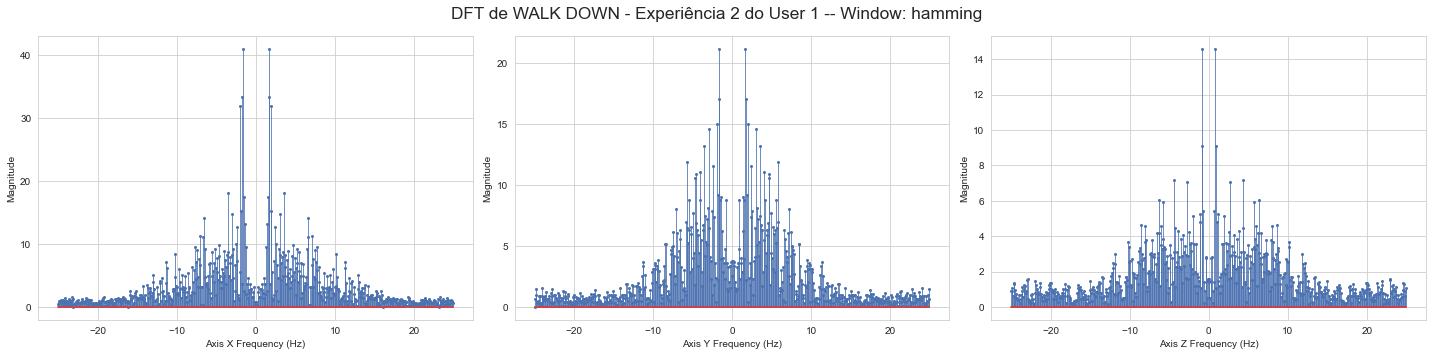

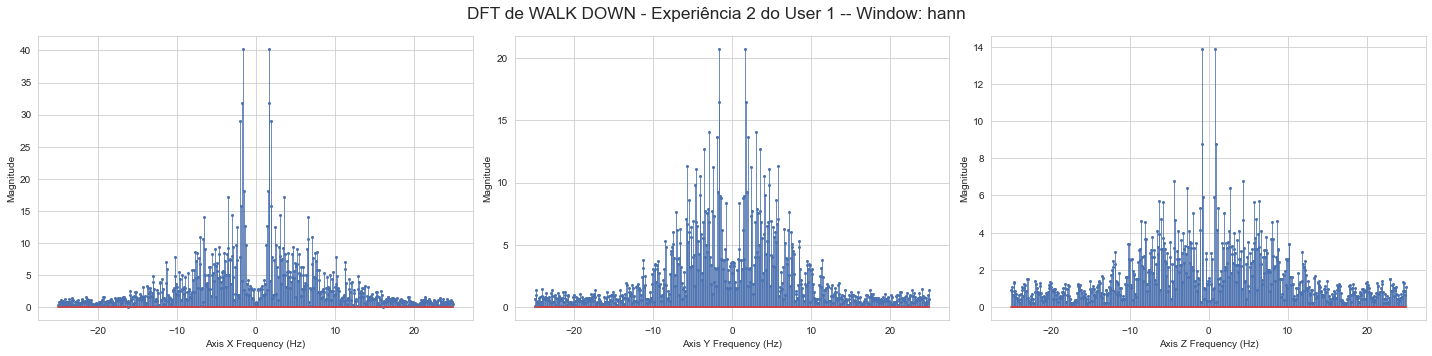

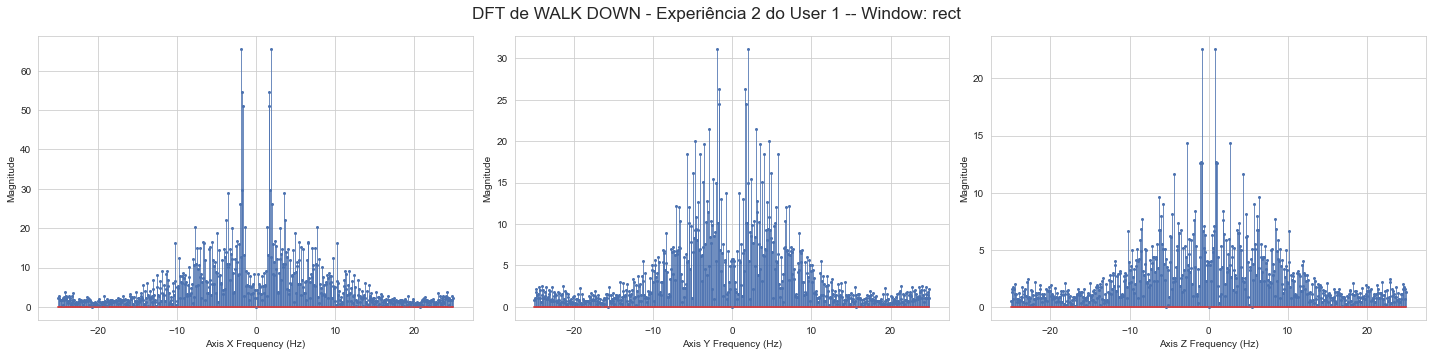

In [18]:
x, y, z = plot_activity_dft(walks_down_user2_2_detrended[0], len(walks_down_user2_2_detrended[0]), 1, 2, 'WALK DOWN', False, 0,'blackman',True)
x, y, z = plot_activity_dft(walks_down_user2_2_detrended[0], len(walks_down_user2_2_detrended[0]), 1, 2, 'WALK DOWN', False, 0, 'hamming', True)
x, y, z = plot_activity_dft(walks_down_user2_2_detrended[0], len(walks_down_user2_2_detrended[0]), 1, 2, 'WALK DOWN', False, 0, 'hann', True)
x, y, z = plot_activity_dft(walks_down_user2_2_detrended[0], len(walks_down_user2_2_detrended[0]), 1, 2, 'WALK DOWN', False, 0, 'rect', True)

## Calculo das DFT's das várias experiências dos utilizadores do nosso dataset

### Para calcular a amplitude em cada segmento é usada a seguinte fórmula:
$$
X_{DFT}[m] - \text{magnitude DFT em } m \\
N = len(\text{ufrag}) \\
C_{m} = \begin{cases} \frac{|X_{DFT}[0]|}{N}, \mbox{ if } m \mbox{ = 0} \\ 
\frac{2|X_{DFT}[m]|}{N}, \mbox{ if } m\mbox{ > 0} \end{cases}
$$

Para fazer o cálculo das DFT's é usada a função 'plot_activity_dft(activity, size, user, exp, title, zeros, threshold, window, plotit)'
* activity: fragmento para calcular a DFT
* size: len(activity)
* user: nº do user
* exp: nº da experiência
* title: nome da atividade
* zeros: ignorar os frequências abaixo da frequência máxima * threshold
* window: tipo de janela a usar
* plotit: mostar o gráfico ou não

#### <u>Nota</u>: Apenas esta a ser mostrado o cálculo das DFT's para a 1º atividade de cada categoria, i.e, apenas o 1º <i>walking</i> dos vários users, porque cada experiência tem 3-4 <i>walkings</i>

In [19]:
hannx, y, z = plot_activity_dft(walks_down_user1_1_detrended[0], len(walks_down_user1_1_detrended[0]), 1, 1, 'WALK DOWN', True, 0.7, 'hann', False)
x, y, z = plot_activity_dft(walks_down_user1_2_detrended[0], len(walks_down_user1_2_detrended[0]), 1, 2, 'WALK DOWN', True, 0.7, 'hann', False)
x, y, z = plot_activity_dft(walks_down_user2_1_detrended[0], len(walks_down_user2_1_detrended[0]), 2, 1, 'WALK DOWN', True, 0.7, 'hann', False)
x, y, z = plot_activity_dft(walks_down_user2_2_detrended[0], len(walks_down_user2_2_detrended[0]), 2, 2, 'WALK DOWN', True, 0.7, 'hann', False)
x, y, z = plot_activity_dft(walks_down_user3_1_detrended[0], len(walks_down_user3_1_detrended[0]), 3, 1, 'WALK DOWN', True, 0.7, 'hann', False)
x, y, z = plot_activity_dft(walks_down_user3_2_detrended[0], len(walks_down_user3_2_detrended[0]), 3, 2, 'WALK DOWN', True, 0.7, 'hann', False)
x, y, z = plot_activity_dft(walks_down_user4_1_detrended[0], len(walks_down_user4_1_detrended[0]), 4, 1, 'WALK DOWN', True, 0.7, 'hann', False)
x, y, z = plot_activity_dft(walks_down_user4_2_detrended[0], len(walks_down_user4_2_detrended[0]), 4, 2, 'WALK DOWN', True, 0.7, 'hann', False)

user1_1
X: Freqs - [1.52671756 1.60305344], Magnitude - [46.23463214 46.48935333]
Y: Freqs - [1.52671756 1.60305344], Magnitude - [46.23463214 46.48935333]
Z: Freqs - [0.76335878], Magnitude - [46.23463214 46.48935333]
------------------
user1_2
X: Freqs - [1.6 1.8], Magnitude - [20.0738737  21.26031854]
Y: Freqs - [1.6 1.8 3.4], Magnitude - [20.0738737  21.26031854]
Z: Freqs - [0.8 1. ], Magnitude - [20.0738737  21.26031854]
------------------
user2_1
X: Freqs - [1.38483965 1.45772595 1.60349854], Magnitude - [23.5274358  29.09449533 30.06308608]
Y: Freqs - [1.38483965 1.45772595 1.53061224 1.60349854 2.696793   6.41399417], Magnitude - [23.5274358  29.09449533 30.06308608]
Z: Freqs - [0.72886297], Magnitude - [23.5274358  29.09449533 30.06308608]
------------------
user2_2
X: Freqs - [1.61812298 1.69902913 1.94174757], Magnitude - [28.94650848 31.73623704 40.21483494]
Y: Freqs - [1.61812298 1.69902913], Magnitude - [28.94650848 31.73623704 40.21483494]
Z: Freqs - [0.80906149], Magnit

#### Exemplo para visualizar a DFT de uma atividade, sendo a linha a vermelho o threshold a partir do qual são consideradas frequências, ignorando assim, todas as que estiverem abaixo da linha

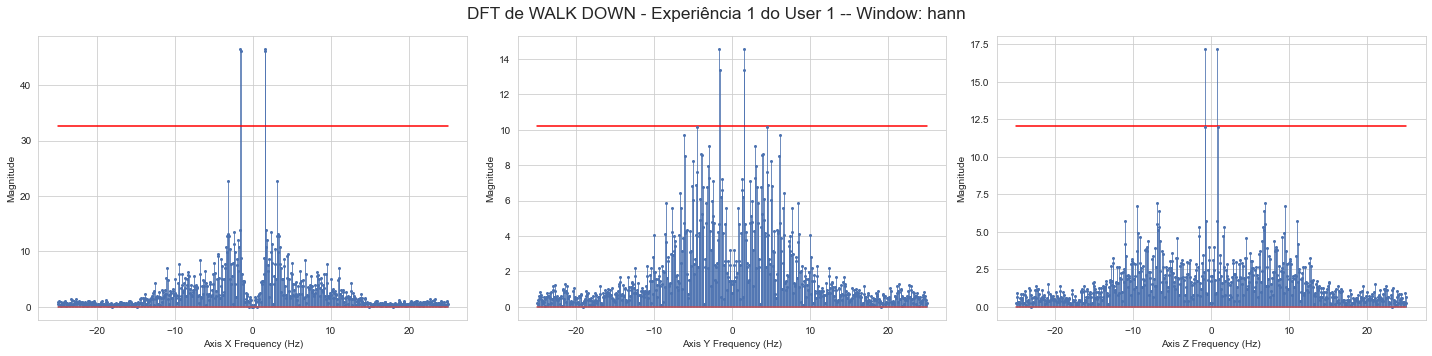

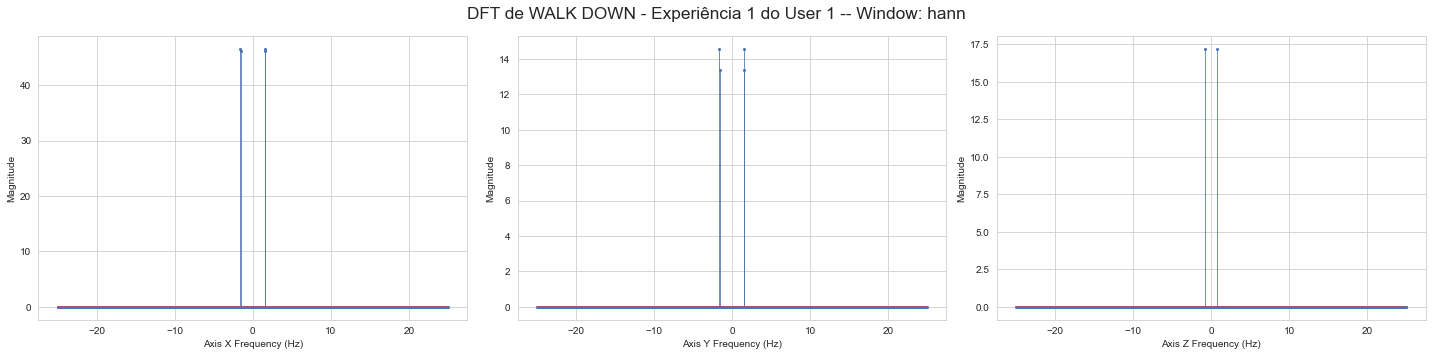

In [20]:
x, y, z = plot_activity_dft(walks_down_user1_1_detrended[0], len(walks_down_user1_1_detrended[0]), 1, 1, 'WALK DOWN', False, 0.7, 'hann', True)
x, y, z = plot_activity_dft(walks_down_user1_1_detrended[0], len(walks_down_user1_1_detrended[0]), 1, 1, 'WALK DOWN', True, 0.7, 'hann', True)


### DFT's da atividades WALK_UP de todos as experiências

In [21]:
x, y, z = plot_activity_dft(walks_up_user1_1_detrended[0], len(walks_up_user1_1_detrended[0]), 1, 1, 'WALK UP', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_up_user1_2_detrended[0], len(walks_up_user1_2_detrended[0]), 1, 2, 'WALK UP', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_up_user2_1_detrended[0], len(walks_up_user2_1_detrended[0]), 2, 1, 'WALK UP', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_up_user2_2_detrended[0], len(walks_up_user2_2_detrended[0]), 2, 2, 'WALK UP', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_up_user3_1_detrended[0], len(walks_up_user3_1_detrended[0]), 3, 1, 'WALK UP', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_up_user3_2_detrended[0], len(walks_up_user3_2_detrended[0]), 3, 2, 'WALK UP', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_up_user4_1_detrended[0], len(walks_up_user4_1_detrended[0]), 4, 1, 'WALK UP', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_up_user4_2_detrended[0], len(walks_up_user4_2_detrended[0]), 4, 2, 'WALK UP', True, 0.8, 'hann', False)

user1_1
X: Freqs - [1.50793651], Magnitude - [33.95792729]
Y: Freqs - [1.50793651], Magnitude - [33.95792729]
Z: Freqs - [0.71428571 0.79365079], Magnitude - [33.95792729]
------------------
user1_2
X: Freqs - [1.52671756 1.60305344], Magnitude - [29.66239879 33.83305094]
Y: Freqs - [1.52671756 1.60305344], Magnitude - [29.66239879 33.83305094]
Z: Freqs - [0.76335878], Magnitude - [29.66239879 33.83305094]
------------------
user2_1
X: Freqs - [1.48148148 1.55555556], Magnitude - [26.6960492  32.04644265]
Y: Freqs - [0.74074074 1.48148148 1.55555556], Magnitude - [26.6960492  32.04644265]
Z: Freqs - [0.74074074 0.81481481 1.55555556], Magnitude - [26.6960492  32.04644265]
------------------
user2_2
X: Freqs - [1.57728707], Magnitude - [34.18940677]
Y: Freqs - [1.57728707], Magnitude - [34.18940677]
Z: Freqs - [0.78864353], Magnitude - [34.18940677]
------------------
user3_1
X: Freqs - [1.40532544], Magnitude - [36.40284097]
Y: Freqs - [1.40532544], Magnitude - [36.40284097]
Z: Freqs -

### DFT's da atividades WALK de todos as experiências

In [22]:
x, y, z = plot_activity_dft(walks_user1_1_detrended[0], len(walks_user1_1_detrended[0]), 1, 1, 'WALK', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_user1_2_detrended[0], len(walks_user1_2_detrended[0]), 1, 2, 'WALK', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_user2_1_detrended[0], len(walks_user2_1_detrended[0]), 2, 1, 'WALK', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_user2_2_detrended[0], len(walks_user2_2_detrended[0]), 2, 2, 'WALK', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_user3_1_detrended[0], len(walks_user3_1_detrended[0]), 3, 1, 'WALK', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_user3_2_detrended[0], len(walks_user3_2_detrended[0]), 3, 2, 'WALK', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_user4_1_detrended[0], len(walks_user4_1_detrended[0]), 4, 1, 'WALK', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(walks_user4_2_detrended[0], len(walks_user4_2_detrended[0]), 4, 2, 'WALK', True, 0.8, 'hann', False)

user1_1
X: Freqs - [1.80412371], Magnitude - [33.92284814]
Y: Freqs - [1.80412371 4.5532646 ], Magnitude - [33.92284814]
Z: Freqs - [0.85910653 0.94501718], Magnitude - [33.92284814]
------------------
user1_2
X: Freqs - [1.67197452], Magnitude - [26.60015691]
Y: Freqs - [1.67197452], Magnitude - [26.60015691]
Z: Freqs - [0.79617834 0.87579618], Magnitude - [26.60015691]
------------------
user2_1
X: Freqs - [1.73383318], Magnitude - [40.27422968]
Y: Freqs - [1.73383318], Magnitude - [40.27422968]
Z: Freqs - [1.73383318], Magnitude - [40.27422968]
------------------
user2_2
X: Freqs - [1.78399229], Magnitude - [47.49894069]
Y: Freqs - [1.78399229], Magnitude - [47.49894069]
Z: Freqs - [1.78399229], Magnitude - [47.49894069]
------------------
user3_1
X: Freqs - [1.60869565], Magnitude - [55.75815028]
Y: Freqs - [1.60869565], Magnitude - [55.75815028]
Z: Freqs - [0.7826087  0.82608696 1.60869565], Magnitude - [55.75815028]
------------------
user3_2
X: Freqs - [1.70807453], Magnitude - 

### DFT's da atividades STAND de todos as experiências

In [23]:
x, y, z = plot_activity_dft(stand_user1_1_detrended[0], len(stand_user1_1_detrended[0]), 1, 1, 'STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_user1_2_detrended[0], len(stand_user1_2_detrended[0]), 1, 2, 'STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_user2_1_detrended[0], len(stand_user2_1_detrended[0]), 2, 1, 'STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_user2_2_detrended[0], len(stand_user2_2_detrended[0]), 2, 2, 'STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_user3_1_detrended[0], len(stand_user3_1_detrended[0]), 3, 1, 'STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_user3_2_detrended[0], len(stand_user3_2_detrended[0]), 3, 2, 'STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_user4_1_detrended[0], len(stand_user4_1_detrended[0]), 4, 1, 'STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_user4_2_detrended[0], len(stand_user4_2_detrended[0]), 4, 2, 'STAND', True, 0.8, 'hann', False)

user1_1
X: Freqs - [1.22199593 1.6293279  2.24032587 2.59674134 3.05498982 3.51323829
 3.56415479 3.66598778 4.63340122 4.68431772 5.70264766 6.87372709
 8.24847251 8.299389  ], Magnitude - [0.12092782 0.12355062 0.12725629 0.12934589 0.13150693 0.13360307
 0.13404799 0.13629578 0.14321607 0.14372449 0.14647033 0.14772906
 0.14880519 0.15011026]
Y: Freqs - [0.15274949 0.20366599], Magnitude - [0.12092782 0.12355062 0.12725629 0.12934589 0.13150693 0.13360307
 0.13404799 0.13629578 0.14321607 0.14372449 0.14647033 0.14772906
 0.14880519 0.15011026]
Z: Freqs - [0.         0.0509165  0.15274949], Magnitude - [0.12092782 0.12355062 0.12725629 0.12934589 0.13150693 0.13360307
 0.13404799 0.13629578 0.14321607 0.14372449 0.14647033 0.14772906
 0.14880519 0.15011026]
------------------
user1_2
X: Freqs - [0.1025641  0.20512821], Magnitude - [0.26595423 0.27544301]
Y: Freqs - [0.1025641  0.15384615 0.20512821], Magnitude - [0.26595423 0.27544301]
Z: Freqs - [0.1025641  0.15384615], Magnitude -

### DFT's da atividades SIT de todos as experiências

In [24]:
x, y, z = plot_activity_dft(sit_user1_1_detrended[0], len(sit_user1_1_detrended[0]), 1, 1, 'SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_user1_2_detrended[0], len(sit_user1_2_detrended[0]), 1, 2, 'SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_user2_1_detrended[0], len(sit_user2_1_detrended[0]), 2, 1, 'SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_user2_2_detrended[0], len(sit_user2_2_detrended[0]), 2, 2, 'SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_user3_1_detrended[0], len(sit_user3_1_detrended[0]), 3, 1, 'SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_user3_2_detrended[0], len(sit_user3_2_detrended[0]), 3, 2, 'SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_user4_1_detrended[0], len(sit_user4_1_detrended[0]), 4, 1, 'SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_user4_2_detrended[0], len(sit_user4_2_detrended[0]), 4, 2, 'SIT', True, 0.8, 'hann', False)

user1_1
X: Freqs - [0.06242197 0.12484395], Magnitude - [ 9.92287628 10.16377299]
Y: Freqs - [0.06242197 0.12484395], Magnitude - [ 9.92287628 10.16377299]
Z: Freqs - [0.06242197 0.12484395], Magnitude - [ 9.92287628 10.16377299]
------------------
user1_2
X: Freqs - [0.         0.06345178 1.33248731 1.39593909 7.55076142 9.20050761], Magnitude - [0.12174196 0.12410144 0.1334192  0.13522743 0.13835507 0.14336607]
Y: Freqs - [0.25380711 0.31725888], Magnitude - [0.12174196 0.12410144 0.1334192  0.13522743 0.13835507 0.14336607]
Z: Freqs - [ 2.66497462  3.10913706  3.17258883  3.23604061  3.68020305  3.74365482
  9.96192893 11.54822335 11.61167513], Magnitude - [0.12174196 0.12410144 0.1334192  0.13522743 0.13835507 0.14336607]
------------------
user2_1
X: Freqs - [4.5696068  4.62274176 6.05738576 6.11052072 6.74814028], Magnitude - [0.14310987 0.14751525 0.15117985 0.15293167 0.17843917]
Y: Freqs - [0.05313496 0.10626993 0.15940489], Magnitude - [0.14310987 0.14751525 0.15117985 0.1529

### DFT's da atividades LAY de todos as experiências

In [25]:
x, y, z = plot_activity_dft(lay_user1_1_detrended[1], len(lay_user1_1_detrended[1]), 1, 1, 'LAY', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lay_user1_2_detrended[1], len(lay_user1_2_detrended[1]), 1, 2, 'LAY', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lay_user2_1_detrended[1], len(lay_user2_1_detrended[1]), 2, 1, 'LAY', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lay_user2_2_detrended[1], len(lay_user2_2_detrended[1]), 2, 2, 'LAY', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lay_user3_1_detrended[1], len(lay_user3_1_detrended[1]), 3, 1, 'LAY', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lay_user3_2_detrended[1], len(lay_user3_2_detrended[1]), 3, 2, 'LAY', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lay_user4_1_detrended[1], len(lay_user4_1_detrended[1]), 4, 1, 'LAY', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lay_user4_2_detrended[1], len(lay_user4_2_detrended[1]), 4, 2, 'LAY', True, 0.8, 'hann', False)

user1_1
X: Freqs - [0.         0.05399568 0.10799136], Magnitude - [19.82274241 22.42617787 23.76943584]
Y: Freqs - [0.05399568 0.10799136], Magnitude - [19.82274241 22.42617787 23.76943584]
Z: Freqs - [0.10799136 0.16198704], Magnitude - [19.82274241 22.42617787 23.76943584]
------------------
user1_2
X: Freqs - [0.06435006], Magnitude - [5.88229833]
Y: Freqs - [0.         0.06435006], Magnitude - [5.88229833]
Z: Freqs - [0.06435006], Magnitude - [5.88229833]
------------------
user2_1
X: Freqs - [0.26288118 0.31545741], Magnitude - [1.58271413 1.91526593]
Y: Freqs - [0.26288118 0.31545741], Magnitude - [1.58271413 1.91526593]
Z: Freqs - [0.26288118], Magnitude - [1.58271413 1.91526593]
------------------
user2_2
X: Freqs - [0.05202914], Magnitude - [0.96237983]
Y: Freqs - [0.         0.05202914 0.31217482], Magnitude - [0.96237983]
Z: Freqs - [0.         0.05202914], Magnitude - [0.96237983]
------------------
user3_1
X: Freqs - [0.        0.0428449], Magnitude - [1.21865251 1.401067

### DFT's da atividades STAND_SIT de todos as experiências

In [26]:
x, y, z = plot_activity_dft(stand_sit_user1_1_detrended, len(stand_sit_user1_1_detrended), 1, 1, 'STAND_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_sit_user1_2_detrended, len(stand_sit_user1_2_detrended), 1, 2, 'STAND_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_sit_user2_1_detrended, len(stand_sit_user2_1_detrended), 2, 1, 'STAND_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_sit_user2_2_detrended, len(stand_sit_user2_2_detrended), 2, 2, 'STAND_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_sit_user3_1_detrended, len(stand_sit_user3_1_detrended), 3, 1, 'STAND_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_sit_user3_2_detrended, len(stand_sit_user3_2_detrended), 3, 2, 'STAND_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_sit_user4_1_detrended, len(stand_sit_user4_1_detrended), 4, 1, 'STAND_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_sit_user4_2_detrended, len(stand_sit_user4_2_detrended), 4, 2, 'STAND_SIT', True, 0.8, 'hann', False)


user1_1
X: Freqs - [0.62893082 0.94339623 1.25786164], Magnitude - [2.16731498 2.28933978 2.36801315]
Y: Freqs - [0.         0.31446541], Magnitude - [2.16731498 2.28933978 2.36801315]
Z: Freqs - [0.31446541 0.62893082], Magnitude - [2.16731498 2.28933978 2.36801315]
------------------
user1_2
X: Freqs - [0.48780488 0.73170732], Magnitude - [3.71306333 4.06672897]
Y: Freqs - [0.24390244 0.48780488], Magnitude - [3.71306333 4.06672897]
Z: Freqs - [0.24390244], Magnitude - [3.71306333 4.06672897]
------------------
user2_1
X: Freqs - [0.32051282 2.88461538 3.20512821], Magnitude - [1.6966117  1.99511949 2.00506666]
Y: Freqs - [0.         0.32051282 0.64102564], Magnitude - [1.6966117  1.99511949 2.00506666]
Z: Freqs - [0.32051282], Magnitude - [1.6966117  1.99511949 2.00506666]
------------------
user2_2
X: Freqs - [0.62893082 1.25786164 1.57232704 2.51572327 2.83018868], Magnitude - [2.38248404 2.39046948 2.52814585 2.65124841 2.80360907]
Y: Freqs - [0.62893082 0.94339623], Magnitude - 

### DFT's da atividades SIT_STAND de todos as experiências

In [27]:
hann, y, z = plot_activity_dft(sit_stand_user1_1_detrended, len(sit_stand_user1_1_detrended), 1, 1, 'SIT_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_stand_user1_2_detrended, len(sit_stand_user1_2_detrended), 1, 2, 'SIT_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_stand_user2_1_detrended, len(sit_stand_user2_1_detrended), 2, 1, 'SIT_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_stand_user2_2_detrended, len(sit_stand_user2_2_detrended), 2, 2, 'SIT_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_stand_user3_1_detrended, len(sit_stand_user3_1_detrended), 3, 1, 'SIT_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_stand_user3_2_detrended, len(sit_stand_user3_2_detrended), 3, 2, 'SIT_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_stand_user4_1_detrended, len(sit_stand_user4_1_detrended), 4, 1, 'SIT_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_stand_user4_2_detrended, len(sit_stand_user4_2_detrended), 4, 2, 'SIT_STAND', True, 0.8, 'hann', False)

user1_1
X: Freqs - [0.6097561  0.91463415], Magnitude - [3.86639824 3.88941785]
Y: Freqs - [0.         0.30487805], Magnitude - [3.86639824 3.88941785]
Z: Freqs - [0.         0.30487805], Magnitude - [3.86639824 3.88941785]
------------------
user1_2
X: Freqs - [0.64516129], Magnitude - [3.72350122]
Y: Freqs - [0.         0.32258065], Magnitude - [3.72350122]
Z: Freqs - [0.         0.32258065 0.64516129], Magnitude - [3.72350122]
------------------
user2_1
X: Freqs - [0.35460993 0.70921986], Magnitude - [3.96535628 4.23640342]
Y: Freqs - [0.35460993], Magnitude - [3.96535628 4.23640342]
Z: Freqs - [0.70921986 1.06382979], Magnitude - [3.96535628 4.23640342]
------------------
user2_2
X: Freqs - [0.72463768], Magnitude - [3.3900597]
Y: Freqs - [0.36231884 0.72463768], Magnitude - [3.3900597]
Z: Freqs - [0.         0.36231884], Magnitude - [3.3900597]
------------------
user3_1
X: Freqs - [0.4587156  0.91743119], Magnitude - [4.92514043 6.04434679]
Y: Freqs - [0.        0.4587156], Magni

### DFT's da atividades STAND_LIE de todos as experiências

In [28]:
x, y, z = plot_activity_dft(stand_lie_user1_1_detrended, len(stand_lie_user1_1_detrended), 1, 1, 'STAND_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_lie_user1_2_detrended, len(stand_lie_user1_2_detrended), 1, 2, 'STAND_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_lie_user2_1_detrended, len(stand_lie_user2_1_detrended), 2, 1, 'STAND_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_lie_user2_2_detrended, len(stand_lie_user2_2_detrended), 2, 2, 'STAND_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_lie_user3_1_detrended, len(stand_lie_user3_1_detrended), 3, 1, 'STAND_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_lie_user3_2_detrended, len(stand_lie_user3_2_detrended), 3, 2, 'STAND_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_lie_user4_1_detrended, len(stand_lie_user4_1_detrended), 4, 1, 'STAND_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(stand_lie_user4_2_detrended, len(stand_lie_user4_2_detrended), 4, 2, 'STAND_LIE', True, 0.8, 'hann', False)

user1_1
X: Freqs - [0.         0.17421603], Magnitude - [13.90441627 16.63766595]
Y: Freqs - [0.         0.17421603], Magnitude - [13.90441627 16.63766595]
Z: Freqs - [0.         0.17421603], Magnitude - [13.90441627 16.63766595]
------------------
user1_2
X: Freqs - [0.18726592], Magnitude - [8.39921331]
Y: Freqs - [0.         0.18726592], Magnitude - [8.39921331]
Z: Freqs - [0.18726592], Magnitude - [8.39921331]
------------------
user2_1
X: Freqs - [0.11990408 0.23980815], Magnitude - [20.71867359 21.52869063]
Y: Freqs - [0.         0.35971223], Magnitude - [20.71867359 21.52869063]
Z: Freqs - [0.11990408 0.23980815], Magnitude - [20.71867359 21.52869063]
------------------
user2_2
X: Freqs - [0.         0.24509804], Magnitude - [6.07938956 6.88468036]
Y: Freqs - [0.24509804 0.49019608], Magnitude - [6.07938956 6.88468036]
Z: Freqs - [0.         0.24509804], Magnitude - [6.07938956 6.88468036]
------------------
user3_1
X: Freqs - [0.23255814], Magnitude - [10.8953839]
Y: Freqs - [0

### DFT's da atividades LIE_STAND de todos as experiências

In [29]:
x, y, z = plot_activity_dft(lie_stand_user1_1_detrended, len(lie_stand_user1_1_detrended), 1, 1, 'LIE_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_stand_user1_2_detrended, len(lie_stand_user1_2_detrended), 1, 2, 'LIE_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_stand_user2_1_detrended, len(lie_stand_user2_1_detrended), 2, 1, 'LIE_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_stand_user2_2_detrended, len(lie_stand_user2_2_detrended), 2, 2, 'LIE_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_stand_user3_1_detrended, len(lie_stand_user3_1_detrended), 3, 1, 'LIE_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_stand_user3_2_detrended, len(lie_stand_user3_2_detrended), 3, 2, 'LIE_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_stand_user4_1_detrended, len(lie_stand_user4_1_detrended), 4, 1, 'LIE_STAND', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_stand_user4_2_detrended, len(lie_stand_user4_2_detrended), 4, 2, 'LIE_STAND', True, 0.8, 'hann', False)

user1_1
X: Freqs - [0.         0.26315789 0.52631579], Magnitude - [7.32771879 7.59727506 9.08391473]
Y: Freqs - [0.         0.26315789 0.52631579], Magnitude - [7.32771879 7.59727506 9.08391473]
Z: Freqs - [0.         0.26315789], Magnitude - [7.32771879 7.59727506 9.08391473]
------------------
user1_2
X: Freqs - [0.         0.20746888], Magnitude - [11.49246701 12.14272526]
Y: Freqs - [0.         0.20746888 0.82987552], Magnitude - [11.49246701 12.14272526]
Z: Freqs - [0.41493776 0.62240664], Magnitude - [11.49246701 12.14272526]
------------------
user2_1
X: Freqs - [0.         0.27777778], Magnitude - [8.96269823 9.89126137]
Y: Freqs - [0.55555556 0.83333333], Magnitude - [8.96269823 9.89126137]
Z: Freqs - [0.55555556], Magnitude - [8.96269823 9.89126137]
------------------
user2_2
X: Freqs - [0.         0.27777778], Magnitude - [7.57512768 7.89338257]
Y: Freqs - [0.27777778 0.55555556 0.83333333], Magnitude - [7.57512768 7.89338257]
Z: Freqs - [0.55555556], Magnitude - [7.5751276

### DFT's da atividades LIE_SIT de todos as experiências

In [30]:
x, y, z = plot_activity_dft(lie_sit_user1_1_detrended, len(lie_sit_user1_1_detrended), 1, 1, 'LIE_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_sit_user1_2_detrended, len(lie_sit_user1_2_detrended), 1, 2, 'LIE_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_sit_user2_1_detrended, len(lie_sit_user2_1_detrended), 2, 1, 'LIE_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_sit_user2_2_detrended, len(lie_sit_user2_2_detrended), 2, 2, 'LIE_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_sit_user3_1_detrended, len(lie_sit_user3_1_detrended), 3, 1, 'LIE_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_sit_user3_2_detrended, len(lie_sit_user3_2_detrended), 3, 2, 'LIE_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_sit_user4_1_detrended, len(lie_sit_user4_1_detrended), 4, 1, 'LIE_SIT', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(lie_sit_user4_2_detrended, len(lie_sit_user4_2_detrended), 4, 2, 'LIE_SIT', True, 0.8, 'hann', False)

user1_1
X: Freqs - [0.         0.25510204], Magnitude - [6.70816087 8.09413443]
Y: Freqs - [0.25510204 0.51020408], Magnitude - [6.70816087 8.09413443]
Z: Freqs - [0.25510204 0.51020408], Magnitude - [6.70816087 8.09413443]
------------------
user1_2
X: Freqs - [0.27322404 0.54644809], Magnitude - [7.26116397 7.40966827]
Y: Freqs - [0.27322404 0.54644809], Magnitude - [7.26116397 7.40966827]
Z: Freqs - [0.54644809], Magnitude - [7.26116397 7.40966827]
------------------
user2_1
X: Freqs - [0.         0.18050542], Magnitude - [15.74112658 16.23058404]
Y: Freqs - [0.36101083], Magnitude - [15.74112658 16.23058404]
Z: Freqs - [0.72202166], Magnitude - [15.74112658 16.23058404]
------------------
user2_2
X: Freqs - [0.         0.35460993], Magnitude - [3.45623695 3.77627338]
Y: Freqs - [0.70921986], Magnitude - [3.45623695 3.77627338]
Z: Freqs - [0.         1.06382979], Magnitude - [3.45623695 3.77627338]
------------------
user3_1
X: Freqs - [0.         0.22421525], Magnitude - [7.9074753

### DFT's da atividades SIT_LIE de todos as experiências

In [31]:
x, y, z = plot_activity_dft(sit_lie_user1_1_detrended, len(sit_lie_user1_1_detrended), 1, 1, 'SIT_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_lie_user1_2_detrended, len(sit_lie_user1_2_detrended), 1, 2, 'SIT_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_lie_user2_1_detrended, len(sit_lie_user2_1_detrended), 2, 1, 'SIT_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_lie_user2_2_detrended, len(sit_lie_user2_2_detrended), 2, 2, 'SIT_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_lie_user3_1_detrended, len(sit_lie_user3_1_detrended), 3, 1, 'SIT_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_lie_user3_2_detrended, len(sit_lie_user3_2_detrended), 3, 2, 'SIT_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_lie_user4_1_detrended, len(sit_lie_user4_1_detrended), 4, 1, 'SIT_LIE', True, 0.8, 'hann', False)
x, y, z = plot_activity_dft(sit_lie_user4_2_detrended, len(sit_lie_user4_2_detrended), 4, 2, 'SIT_LIE', True, 0.8, 'hann', False)

user1_1
X: Freqs - [0.2617801  0.52356021], Magnitude - [4.41528532 4.62576396]
Y: Freqs - [0.        0.2617801], Magnitude - [4.41528532 4.62576396]
Z: Freqs - [0.        0.2617801], Magnitude - [4.41528532 4.62576396]
------------------
user1_2
X: Freqs - [0.21186441 0.42372881], Magnitude - [9.08651184 9.13204613]
Y: Freqs - [0.21186441 0.42372881], Magnitude - [9.08651184 9.13204613]
Z: Freqs - [0.42372881], Magnitude - [9.08651184 9.13204613]
------------------
user2_1
X: Freqs - [0.22321429 0.44642857], Magnitude - [8.80851536 9.33281723]
Y: Freqs - [0.         0.66964286], Magnitude - [8.80851536 9.33281723]
Z: Freqs - [0.22321429 0.44642857 0.66964286], Magnitude - [8.80851536 9.33281723]
------------------
user2_2
X: Freqs - [0.32679739 0.65359477], Magnitude - [5.11483091 5.75966243]
Y: Freqs - [0.65359477], Magnitude - [5.11483091 5.75966243]
Z: Freqs - [0.         0.32679739 0.65359477], Magnitude - [5.11483091 5.75966243]
------------------
user3_1
X: Freqs - [0.33333333 0

## Frequências representativas de cada atividade
Para obter as frequências que representam cada atividade, é usada a função 'get_frequencies_from_activities()' que da print ao 'describe()' de um <i>DataFrame</i> do módulo <i>Pandas</i> que tem a informação de uma atividade de todos os <i>users</i>. O 'describe()' mostra o valor minimo presente, o maximo, a média, o desvio padrão, entre outros. Com estes dados podemos escolher um intervalo de frequências, em cada eixo, que representam uma atividade. 

### Walking

In [32]:
d = get_frequencies_from_activities(walks_user, 0.8, 'hann')
walk_user_freq = {'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                  'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                  'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,22.000000,22.000000,31.000000
mean,1.791564,1.791564,1.195416
std,0.103454,0.103454,0.439723
min,1.608696,1.608696,0.782609
25%,1.709859,1.709859,0.867246
50%,1.778190,1.778190,0.934066
75%,1.858925,1.858925,1.709652
95%,1.955620,1.955620,1.871362
max,2.008239,2.008239,1.923077


In [33]:
d2 = get_amplitudes_from_activities(walks_user, 0.8, 'hann' )
walk_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,20.000000,21.000000,21.000000
mean,0.001137,0.001162,0.001160
std,0.000867,0.000852,0.000851
min,0.000013,0.000013,0.000013
25%,0.000441,0.000473,0.000473
50%,0.001037,0.001124,0.001124
75%,0.001755,0.001722,0.001722
max,0.002987,0.002987,0.002987


### Walking down

In [34]:
d = get_frequencies_from_activities(walks_down_user, 0.9, 'hann')
walk_down_user_freq = {'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                      'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                      'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,35.000000,38.000000,28.000000
mean,1.716854,1.707061,0.946144
std,0.169339,0.269069,0.315055
min,1.396648,0.952381,0.698324
25%,1.610811,1.603165,0.786795
50%,1.685393,1.681682,0.854592
75%,1.797666,1.784919,0.898881
95%,2.012077,2.043494,1.761520
max,2.233010,2.823920,1.904762


In [35]:
d2 = get_amplitudes_from_activities(walks_down_user, 0.8, 'hann' )
walk_down_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,26.000000,27.000000,27.000000
mean,0.004004,0.003874,0.004409
std,0.002649,0.002683,0.003345
min,0.000124,0.000124,0.000124
25%,0.002513,0.002147,0.002515
50%,0.003378,0.003097,0.003659
75%,0.005559,0.005530,0.005789
max,0.010560,0.010560,0.014957


### Walking up

In [36]:
d = get_frequencies_from_activities(walks_up_user, 0.8, 'hann')
walk_up_user_freq = {'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                      'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                      'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,38.000000,39.000000,33.000000
mean,1.563785,1.481142,0.855042
std,0.115477,0.258981,0.249909
min,1.211735,0.740741,0.637755
25%,1.504804,1.478204,0.740741
50%,1.578533,1.548673,0.790861
75%,1.643491,1.613215,0.814815
95%,1.707873,1.706764,1.587998
max,1.785714,1.785714,1.645768


In [37]:
d2 = get_amplitudes_from_activities(walks_up_user, 0.8, 'hann' )
walk_up_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,25.000000,26.000000,26.000000
mean,0.003101,0.003490,0.003249
std,0.001940,0.002746,0.002045
min,0.000447,0.000447,0.000447
25%,0.001721,0.001776,0.001776
50%,0.002595,0.002774,0.002774
75%,0.004289,0.004319,0.004319
max,0.008043,0.013203,0.008043


### Stand

In [38]:
d = get_frequencies_from_activities(stand_user, 0.8, 'hann', up = 1.2)
stand_user_freq = {'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                  'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                  'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,14.000000,27.000000,24.000000
mean,0.086932,0.131297,0.109660
std,0.047769,0.097448,0.082470
min,0.042589,0.042589,0.043592
25%,0.048810,0.055808,0.050515
50%,0.070743,0.102564,0.086681
75%,0.112447,0.169770,0.138544
95%,0.160431,0.311779,0.292150
max,0.205128,0.442478,0.356824


In [39]:
d2 = get_amplitudes_from_activities(stand_user, 0.8, 'hann' )
stand_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,16.000000,17.000000,17.000000
mean,0.000801,0.001187,0.000969
std,0.000739,0.001746,0.000996
min,0.000038,0.000038,0.000038
25%,0.000307,0.000316,0.000316
50%,0.000441,0.000460,0.000460
75%,0.001366,0.001390,0.001390
max,0.002327,0.007367,0.003658


### Sit

In [40]:
d = get_frequencies_from_activities(sit_user, 0.8, 'hann', up = 0.7)
sit_user_freq = {'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                  'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                  'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,21.000000,23.000000,26.000000
mean,0.142562,0.164752,0.159819
std,0.132224,0.153959,0.143705
min,0.049950,0.049950,0.052138
25%,0.061350,0.060723,0.062500
50%,0.101626,0.115741,0.111576
75%,0.124844,0.206606,0.170060
95%,0.410317,0.509748,0.495779
max,0.521376,0.573514,0.584485


In [41]:
d2 = get_amplitudes_from_activities(sit_user, 0.8, 'hann' )
sit_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,16.000000,17.000000,17.000000
mean,0.002896,0.003122,0.003104
std,0.005999,0.005883,0.005872
min,0.000061,0.000061,0.000061
25%,0.000231,0.000240,0.000240
50%,0.000605,0.000606,0.000606
75%,0.001575,0.001632,0.001632
95%,0.017548,0.017433,0.017433
max,0.019276,0.019276,0.019276


### Lay

In [42]:
d = get_frequencies_from_activities(lay_user, 0.9, 'hann', up = 1.99)
lay_user_freq ={'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                  'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                  'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,12.000000,11.000000,16.000000
mean,0.146485,0.423629,0.155088
std,0.138294,0.690264,0.152799
min,0.042845,0.042845,0.042845
25%,0.057002,0.055017,0.051674
50%,0.077547,0.090744,0.077547
75%,0.157632,0.289169,0.176558
95%,0.412457,1.807507,0.440034
max,0.421743,1.834320,0.473373


In [43]:
d2 = get_amplitudes_from_activities(lay_user, 0.8, 'hann' )
lay_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2 = d2[d2['Z']<0.045]
d2.describe()

,X,Y,Z
count,15.000000,16.000000,16.000000
mean,0.001383,0.001307,0.001341
std,0.001481,0.001463,0.001441
min,0.000139,0.000139,0.000139
25%,0.000220,0.000187,0.000233
50%,0.000770,0.000764,0.000764
75%,0.002087,0.002087,0.002087
max,0.005600,0.005600,0.005600


### Stand to sit

In [44]:
d = get_frequencies_from_activities(stand_sit_user, 0.8, 'hann', up = 2)
stand_sit_user_freq ={'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                  'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                  'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,18.000000,14.000000,12.000000
mean,0.782109,0.456727,0.503590
std,0.450796,0.214691,0.227293
min,0.264550,0.212766,0.243902
25%,0.498129,0.290481,0.314465
50%,0.633614,0.390071,0.459791
75%,0.919412,0.612941,0.649003
95%,1.623712,0.791182,0.849080
max,1.914894,0.943396,0.851064


In [45]:
d2 = get_amplitudes_from_activities(stand_sit_user, 0.8, 'hann' )
stand_sit_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,8.000000,9.000000,9.000000
mean,0.018667,0.037289,0.017109
std,0.017658,0.058256,0.017166
min,0.000007,0.000007,0.000007
25%,0.009935,0.010453,0.008381
50%,0.012808,0.014470,0.011145
75%,0.022067,0.026736,0.020511
max,0.057635,0.186264,0.057635


### Sit to stand

In [46]:
d = get_frequencies_from_activities(sit_stand_user, 0.8, 'hann')
sit_stand_user_freq = {'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                  'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                  'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,13.000000,9.000000,15.000000
mean,0.677459,0.393575,0.576774
std,0.209961,0.134689,0.249145
min,0.354610,0.274725,0.274725
25%,0.549451,0.322581,0.357216
50%,0.704225,0.354610,0.549451
75%,0.775194,0.387597,0.742207
95%,0.972994,0.618269,0.961351
max,1.056338,0.724638,1.063830


In [47]:
d2 = get_amplitudes_from_activities(sit_stand_user, 0.8, 'hann' )
sit_stand_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,8.000000,9.000000,9.000000
mean,0.025170,0.047133,0.024088
std,0.012722,0.066954,0.012335
min,0.000218,0.000218,0.000218
25%,0.021377,0.023698,0.015426
50%,0.028274,0.032443,0.024104
75%,0.033461,0.034401,0.033147
max,0.038936,0.222834,0.038936


### Stand to lie

In [48]:
d = get_frequencies_from_activities(stand_lie_user, 0.8, 'hann')
stand_lie_user_freq = {'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                  'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                  'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,10.000000,14.000000,12.000000
mean,0.257552,0.373114,0.272302
std,0.159588,0.182522,0.163495
min,0.119904,0.157233,0.119904
25%,0.161479,0.235693,0.169970
50%,0.209912,0.337089,0.226742
75%,0.243776,0.462130,0.305202
95%,0.544872,0.683962,0.569767
max,0.641026,0.786164,0.697674


In [49]:
d2 = get_amplitudes_from_activities(stand_lie_user, 0.8, 'hann' )
stand_lie_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,8.000000,9.000000,9.000000
mean,0.068918,0.066520,0.064502
std,0.034537,0.033098,0.034918
min,0.018481,0.018481,0.018481
25%,0.050583,0.047337,0.029168
50%,0.070327,0.066726,0.066726
75%,0.097591,0.096895,0.096895
max,0.112507,0.112507,0.112507


### Lie to stand

In [50]:
d = get_frequencies_from_activities(lie_stand_user, 0.8, 'hann')
lie_stand_user_freq ={'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                      'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                      'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,10.000000,14.000000,10.000000
mean,0.332648,0.497099,0.450426
std,0.126351,0.229365,0.148940
min,0.207469,0.207469,0.263158
25%,0.274362,0.281863,0.301661
50%,0.285948,0.540936,0.485247
75%,0.302574,0.605148,0.580065
95%,0.568167,0.833333,0.615051
max,0.602410,0.833333,0.622407


In [51]:
d2 = get_amplitudes_from_activities(lie_stand_user, 0.8, 'hann' )
lie_stand_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,8.000000,9.000000,9.000000
mean,0.091609,0.081640,0.087813
std,0.016116,0.033491,0.018892
min,0.064872,0.001890,0.057446
25%,0.083119,0.079971,0.079971
50%,0.090326,0.085200,0.085200
75%,0.103053,0.100770,0.100770
max,0.112536,0.112536,0.112536


### Lie to sit

In [52]:
d = get_frequencies_from_activities(lie_sit_user, 0.8, 'hann', up = 1.6)
lie_sit_user_freq ={'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                      'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                      'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,9.000000,10.000000,12.000000
mean,0.284676,0.431952,0.458814
std,0.108669,0.187067,0.249671
min,0.180505,0.224215,0.224215
25%,0.233645,0.259633,0.251135
50%,0.255102,0.414150,0.472879
75%,0.273224,0.537387,0.519265
95%,0.469713,0.713886,0.875835
max,0.546448,0.717703,1.063830


In [53]:
d2 = get_amplitudes_from_activities(lie_sit_user, 0.8, 'hann' )
lie_sit_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,8.000000,9.000000,9.000000
mean,0.087353,0.084559,0.086492
std,0.028719,0.028142,0.026988
min,0.053564,0.053564,0.053564
25%,0.064894,0.062206,0.068451
50%,0.083308,0.076828,0.079605
75%,0.113098,0.111735,0.111735
max,0.127048,0.127048,0.127048


### Sit to lie

In [54]:
d = get_frequencies_from_activities(sit_lie_user, 0.8, 'hann')
sit_lie_user_freq = {'X':[d['X'].mean()-d['X'].std(), d['X'].mean()+d['X'].std()], 
                      'Y': [d['Y'].mean()-d['Y'].std(), d['Y'].mean()+d['Y'].std()], 
                      'Z':[d['Z'].mean()-d['Z'].std(), d['Z'].mean()+d['Z'].std()]}
d.describe(percentiles = [.25,.50,.75,.95])

,X,Y,Z
count,13.000000,9.000000,13.000000
mean,0.369594,0.413954,0.410050
std,0.161608,0.161521,0.178632
min,0.211864,0.211864,0.213675
25%,0.224215,0.295858,0.261780
50%,0.326797,0.423729,0.333333
75%,0.446429,0.448430,0.591716
95%,0.658824,0.663224,0.667857
max,0.666667,0.669643,0.669643


In [55]:
d2 = get_amplitudes_from_activities(sit_lie_user, 0.8, 'hann' )
sit_lie_user_amp = {'X':[d2['X'].mean()-d2['X'].std(), d2['X'].mean()+d2['X'].std()], 
                  'Y': [d2['Y'].mean()-d2['Y'].std(), d2['Y'].mean()+d2['Y'].std()], 
                  'Z':[d2['Z'].mean()-d2['Z'].std(), d2['Z'].mean()+d2['Z'].std()]}
d2.describe()

,X,Y,Z
count,8.000000,9.000000,9.000000
mean,0.064288,0.058736,0.060715
std,0.029405,0.032156,0.029520
min,0.033094,0.014317,0.032132
25%,0.044487,0.043526,0.043526
50%,0.047945,0.045166,0.045166
75%,0.093500,0.090805,0.090805
max,0.104600,0.104600,0.104600


### <i>Print</i> das frequências e amplitudes representativas de cada atividade

#### Juntar as freqências e amplitudes num dicionário para ser mais fácil de fazer a indentificação

In [56]:
atividades = {}
atividades['walk'] = walk_user_freq
atividades['walk_down'] = walk_down_user_freq
atividades['walk_up'] = walk_up_user_freq
atividades['stand'] = stand_user_freq
atividades['lay'] = lay_user_freq
atividades['sit'] = sit_user_freq
atividades['stand_sit'] = stand_sit_user_freq
atividades['sit_stand'] = sit_stand_user_freq
atividades['stand_lie'] = stand_lie_user_freq
atividades['lie_stand'] = lie_stand_user_freq
atividades['lie_sit'] = lie_sit_user_freq
atividades['sit_lie'] = sit_lie_user_freq

amplitudes = {}
amplitudes['walk'] = walk_user_amp
amplitudes['walk_down'] = walk_down_user_amp
amplitudes['walk_up'] = walk_up_user_amp
amplitudes['stand'] = stand_user_amp
amplitudes['lay'] = lay_user_amp
amplitudes['sit'] = sit_user_amp
amplitudes['stand_sit'] = stand_sit_user_amp
amplitudes['sit_stand'] = sit_stand_user_amp
amplitudes['stand_lie'] = stand_lie_user_amp
amplitudes['lie_stand'] = lie_stand_user_amp
amplitudes['lie_sit'] = lie_sit_user_amp
amplitudes['sit_lie'] = sit_lie_user_amp

In [57]:
atividades = pd.DataFrame(atividades).transpose()
amplitudes = pd.DataFrame(amplitudes).transpose()

In [58]:
atividades['X'] = atividades['X'].apply(lambda x: [0, x[1]] if x[0]<0 else x)
atividades['Y'] = atividades['Y'].apply(lambda x: [0, x[1]] if x[0]<0 else x)
atividades['Z'] = atividades['Z'].apply(lambda x: [0, x[1]] if x[0]<0 else x)
amplitudes['X'] = amplitudes['Y'].apply(lambda x: [0, x[1]] if x[0]<0 else x)
amplitudes['Y'] = amplitudes['Z'].apply(lambda x: [0, x[1]] if x[0]<0 else x)
amplitudes['Z'] = amplitudes['Z'].apply(lambda x: [0, x[1]] if x[0]<0 else x)

In [59]:
atividades

,X,Y,Z
walk,"[1.6881096090884986, 1.8950174754569558]","[1.6881096090884986, 1.8950174754569558]","[0.7556936704435411, 1.6351390960080714]"
walk_down,"[1.5475146373694646, 1.8861934346305353]","[1.4379926394178355, 1.976129829003217]","[0.6310885206142545, 1.2611985508143169]"
walk_up,"[1.4483086838266945, 1.6792616872259367]","[1.222160300300819, 1.7401230263658474]","[0.6051331453823731, 1.1049513582539907]"
stand,"[0.03916251433206329, 0.134700839953651]","[0.033848943986252336, 0.2287457449026366]","[0.027189952819154276, 0.19213004218084573]"
lay,"[0.008191150745811088, 0.2847794759208556]","[0, 1.1138933152460027]","[0.0022892547681824527, 0.3078863352318175]"
sit,"[0.010338401405572323, 0.2747854452610944]","[0.010792829165640144, 0.3187115282256642]","[0.016113401557000695, 0.3035242907506916]"
stand_sit,"[0.3313132154377842, 1.2329052923399937]","[0.24203562771548448, 0.6714177708559441]","[0.2762974843654732, 0.7308826789678601]"
sit_stand,"[0.4674980861067738, 0.8874204415855339]","[0.25888631123082706, 0.5282638221025062]","[0.3276297717642791, 0.825918980235721]"
stand_lie,"[0.09796356991179939, 0.4171397360882006]","[0.19059199405063226, 0.5556355216636535]","[0.10880732699719159, 0.43579741300280844]"
lie_stand,"[0.2062977979112846, 0.4589991160887154]","[0.2677339712849378, 0.7264646572864907]","[0.30148593847851435, 0.5993664775214855]"


In [60]:
amplitudes

,X,Y,Z
walk,"[0.0003098018144702401, 0.0020147261480654532]","[0.0003088159309995067, 0.00201091918275778]","[0.0003088159309995067, 0.00201091918275778]"
walk_down,"[0.0011914793645259277, 0.0065571948916225455]","[0.0010644581081070388, 0.007754457366755293]","[0.0010644581081070388, 0.007754457366755293]"
walk_up,"[0.0007438539845719657, 0.006235700306742114]","[0.0012039908485395809, 0.0052936853591499765]","[0.0012039908485395809, 0.0052936853591499765]"
stand,"[0, 0.002932993490455452]","[0, 0.0019651195381634565]","[0, 0.0019651195381634565]"
lay,"[0, 0.015597406657412341]","[0, 0.015618364852172833]","[0, 0.015618364852172833]"
sit,"[0, 0.009004463586526963]","[0, 0.0089763106842407]","[0, 0.0089763106842407]"
stand_sit,"[0, 0.09554523432030557]","[0, 0.03427538951161784]","[0, 0.03427538951161784]"
sit_stand,"[0, 0.11408697612129319]","[0.011752221168378462, 0.03642288450143591]","[0.011752221168378462, 0.03642288450143591]"
stand_lie,"[0.03342236360947257, 0.09961836069515559]","[0.029583144898928042, 0.09941994799542966]","[0.029583144898928042, 0.09941994799542966]"
lie_stand,"[0.048149285619367335, 0.11513097390183698]","[0.06892055922189434, 0.10670553669494391]","[0.06892055922189434, 0.10670553669494391]"


## Calculo dos passos por minuto
<p style='text-align: justify;'>
Para estimar os passos por minuto, é necessário ter o valor do período, ou da frequência do sinal corresponde à atividade.
Visto que não temos a frequência exata do sinal, é necessário, também, estimar este parâmetro. Esta estimativa é calculada através de uma média aritmética das frequências mais significativas presentes em cada segmento da atividade em estudo.<br>
O eixo das acelerações 'X' pareceu-nos o mais indicado para o cálculo, pois é o que sofre mais alterações em cada passo, visto termos oscilações verticais aquando do mesmo, principalmente na subida e descida de escadas. O eixo 'Y', no entanto, também seria um bom candidato, visto termos uma rotação de tronco que acompanha o passo.<br>
O número de passos por minuto é calculado através da seguinte fórmula: <br>
</p>

$$
steps = \frac{60}{\frac{1}{freqs[X]}}
$$

$\frac{1}{freqs[X]}$ = período do sinal. Apenas é necesário fazer $\frac{60}{T}$ para obter os passos por minuto.


### Walking

In [61]:
aux = []
for i in range(4):
    for j in range(2):
        d = get_frequencies_from_activities(walks_user[i+j], 0.8, 'hann')
        steps = 60 / (1/d['X'].mean())
        aux.append(steps)
        print(f'user{i+1}_{j+1} -> {steps:.2f}')

d = pd.DataFrame(np.array(aux), columns = ['Steps p/ min'])
d.describe().loc[['mean','std']]

user1_1 -> 108.40
user1_2 -> 102.04
user2_1 -> 102.04
user2_2 -> 105.19
user3_1 -> 105.19
user3_2 -> 109.18
user4_1 -> 109.18
user4_2 -> 98.97


,Steps p/ min
mean,105.022787
std,3.787422


### Walking up

In [62]:
aux = []
for i in range(4):
    for j in range(2):
        d = get_frequencies_from_activities(walks_up_user[i+j], 0.8, 'hann')
        steps = 60 / (1/d['X'].mean())
        aux.append(steps)
        print(f'user{i+1}_{j+1} -> {steps:.2f}')

d = pd.DataFrame(np.array(aux), columns = ['Steps p/ min'])
d.describe().loc[['mean','std']]

user1_1 -> 88.70
user1_2 -> 91.84
user2_1 -> 91.84
user2_2 -> 94.79
user3_1 -> 94.79
user3_2 -> 97.88
user4_1 -> 97.88
user4_2 -> 96.84


,Steps p/ min
mean,94.321010
std,3.294955


### Walking down

In [63]:
aux = []
for i in range(4):
    for j in range(2):
        d = get_frequencies_from_activities(walks_down_user[i+j], 0.8, 'hann')
        steps = 60 / (1/d['X'].mean())
        aux.append(steps)
        print(f'user{i+1}_{j+1} -> {steps:.2f}')

d = pd.DataFrame(np.array(aux), columns = ['Steps p/ min'])
d.describe().loc[['mean','std']]

user1_1 -> 102.73
user1_2 -> 104.59
user2_1 -> 104.59
user2_2 -> 103.96
user3_1 -> 103.96
user3_2 -> 103.84
user4_1 -> 103.84
user4_2 -> 110.39


,Steps p/ min
mean,104.737793
std,2.354068


## Métodos para distinguir as atividades de transição, dinâmicas e estáticas
<p style='text-align: justify;'>
Pela análise da sinal tempo, bem como da sua Transformada de Fourier, foi possível verificar que as atividades estáticas, em casos ideais (sem ruído), são caracterizadas por terem uma amplitude baixa. Num caso ideal, seriam também caracterizados por uma grande magnitude na frequência 0.
As atividades de transição têm uma duração de apenas alguns instantes quando comparadas com as estáticas e dinâmicas, pelo que a duração das atividades poderiam ser um método de distinção entre atividades de transição e estáticas e dinâmicas.
Para as atividades dinâmicas, a verificação, é feita principalmente a partir da frequências obtidas antriormente. 
</p>

### 3.5 Verificação da atividade presente em cada Segmento para teste à aensibilidade e especificidade dos parâmetros usados para distinguir atividades

colocar um array com os resultados que são suposto obter (pela ordem do ficheiro 'activity_labels.txt')

In [64]:
real = []
for i in intervalos:
    real.append( convert_to_class(i) )

Mapear os resultados para formato binário, para cada classe, de modo a obter uma melhor matriz confusão.
Isto é. Conforme a classe de atividades que estamos a testar colocar 1 onde é essa atividade, 0 onde não é essa atividade.
Estes são os valores de 'teste' para cada atividade.

In [65]:
dinamicos = list(map(lambda x: 1 if x==3 else 0, real))
estaticos = list(map(lambda x: 1 if x==1 else 0, real))
transicao = list(map(lambda x: 1 if x==2 else 0, real))

In [66]:
predict = []
for i in intervalos:
    value = get_sample_predict(get_user(i[1], i[0]), 1, [i[-2], i[-1]])
    predict.append( value )

de igual modo, mapear a resposta obtida para formato binaria conforme a atividade a testar.

In [67]:
dinamicos_predict = list(map(lambda x: 1 if x==3 else 0, predict))
estaticos_predict = list(map(lambda x: 1 if x==1 else 0, predict))
transicao_predict = list(map(lambda x: 1 if x==2 else 0, predict))

##### Formatação da matriz de confusão da livraria sklearn:
$
\begin{array}{c|c}
    TrueNegative & FalsePositive
    \\ \hline
    FalseNegative & TruePosivite
\end{array}
$

In [68]:
a = confusion_matrix(dinamicos, dinamicos_predict)
b = confusion_matrix(estaticos, estaticos_predict)
c = confusion_matrix(transicao, transicao_predict)

In [69]:
md("""
### Matriz de confusão para atividades dinâmicas
$
\\begin{array}{c|c}
    %d & %d
    \\\\ \\hline
    %d & %d
\\end{array}
$
### Matriz de confusão para atividades estáticas
$
\\begin{array}{c|c}
    %d & %d
    \\\\ \\hline
    %d & %d
\\end{array}
$
### Matriz de confusão para atividades transição
$
\\begin{array}{c|c}
    %d & %d
    \\\\ \\hline
    %d & %d
\\end{array}
$
"""%(a[0,0], a[0,1], a[1,0], a[1,1], b[0,0], b[0,1], b[1,0], b[1,1], c[0,0], c[0,1], c[1,0], c[1,1]))



### Matriz de confusão para atividades dinâmicas
$
\begin{array}{c|c}
    91 & 5
    \\ \hline
    0 & 71
\end{array}
$
### Matriz de confusão para atividades estáticas
$
\begin{array}{c|c}
    114 & 5
    \\ \hline
    2 & 46
\end{array}
$
### Matriz de confusão para atividades transição
$
\begin{array}{c|c}
    119 & 0
    \\ \hline
    8 & 40
\end{array}
$


In [70]:
md("""
### Sensibilidade para deteção de atividades dinâmicas:
$
\\frac{%d}{%d+%d} = %.2f \\%%
$ 
### Especificidade para deteção de atividades dinâmicas:
$ 
\\frac{%d}{%d+%d} = %.2f \\%%
$
"""%(a[1,1], a[1,1], a[1,0], a[1,1]/(a[1,1]+a[1,0])*100, a[0,0], a[0,0], a[0,1], a[0,0] / (a[0,0]+a[0,1])*100
))


### Sensibilidade para deteção de atividades dinâmicas:
$
\frac{71}{71+0} = 100.00 \%
$ 
### Especificidade para deteção de atividades dinâmicas:
$ 
\frac{91}{91+5} = 94.79 \%
$


In [71]:
md("""
### Sensibilidade para detecao de atividade estatica:
$
\\frac{%d}{%d+%d} = %.2f \\%%
$ 
### Especificidade para deteção de atividade estática:
$ 
\\frac{%d}{%d+%d} = %.2f \\%%
$
"""%(b[1,1], b[1,1], b[1,0], b[1,1]/(b[1,1]+b[1,0])*100, b[0,0], b[0,0], b[0,1], b[0,0] / (b[0,0]+b[0,1])*100
))


### Sensibilidade para detecao de atividade estatica:
$
\frac{46}{46+2} = 95.83 \%
$ 
### Especificidade para deteção de atividade estática:
$ 
\frac{114}{114+5} = 95.80 \%
$


In [72]:
md("""
### Sensibilidade para detecao de atividades de transição:
$
\\frac{%d}{%d+%d} = %.2f \\%%
$ 
### Especificidade para deteção de atividades de transição:
$ 
\\frac{%d}{%d+%d} = %.2f \\%%
$
"""%(c[1,1], c[1,1], c[1,0], c[1,1]/(c[1,1]+c[1,0])*100, c[0,0], c[0,0], c[0,1], c[0,0] / (c[0,0]+c[0,1])*100
))


### Sensibilidade para detecao de atividades de transição:
$
\frac{40}{40+8} = 83.33 \%
$ 
### Especificidade para deteção de atividades de transição:
$ 
\frac{119}{119+0} = 100.00 \%
$


## 4. STFT - <i> Short Time Fourrier Transform </i>

<p style='text-align: justify;'>
Como na STFT, as janelas vão ser sempre de pequena duração, a duração das atividades deixa de ser uma fator útil na distinção entre atividades. Assim,  atualizámos o método de distinção entre uma atividade de transição e as restantes. Para tal, é aplicada a média móvel como um filtro de ruído, que quando sobreposta com o sinal original, é possível separar as transições. É possível verificar uma alteração significativa nos valores da média nas atividades de transição, permitindo assim a sua distinção das estáticas e dinâmicas. Para a média móvel, é usado um valor fixo para calcular a média aritmética em cada janela, não dependendo do nehum valor extraido do sinal.
Na célula abaixo, é possível ver como a média móvel é usada para distinguir este tipo de atividades.
</p>


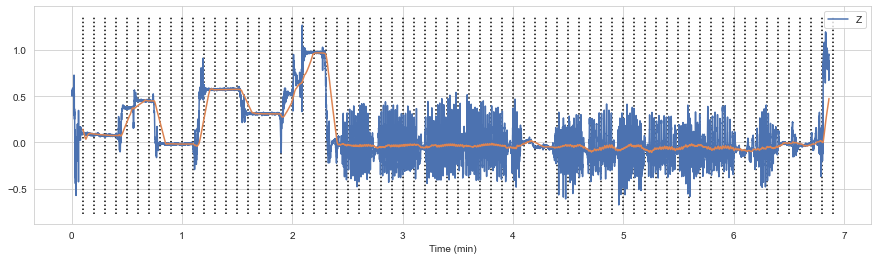

In [73]:
v = 300 # numero de pontos para calcular a média aritmética
step = 300 # tamanho da janela
user = user1_1
media_movel = []
for i in range(v,len(user)):
    media_movel.append( (user['Z'][i-v:i-1]/v).sum() )

plt.figure(figsize=(15,4))
axe = plt.subplot(111)
user.plot('Time (min)','Z', ax = axe)
axe.plot(user['Time (min)'][v:], media_movel)
plt.vlines([(v+i)/60/50 for i in range(0, len(user), step)], plt.ylim()[0], plt.ylim()[1], linestyle = ':', color='k')
plt.show()

<p style='text-align: justify;'>
A freqência também pode ser usada no processo de seleção entre tipos de atividades. Já no caso de distinguir as atividades dentro de cada tipo, i.e, distinguir os vários <i>walkings</i> entre si, por exemplo,  apenas com base nas freqências de um eixo (neste caso, o Z), torna-se praticamente impossível sendo que seria necessário comparar as frequências, da mesma atividade, nos restantes eixos ou até ter de recorrer a outros sensores como o giroscópio. Na célula abaixo é possivel verificar o <i>overlap</i> que as frequências têm entre si, tornando-as praticamente indistinguíveis umas das outras apenas pela sua freqência.
<p/>

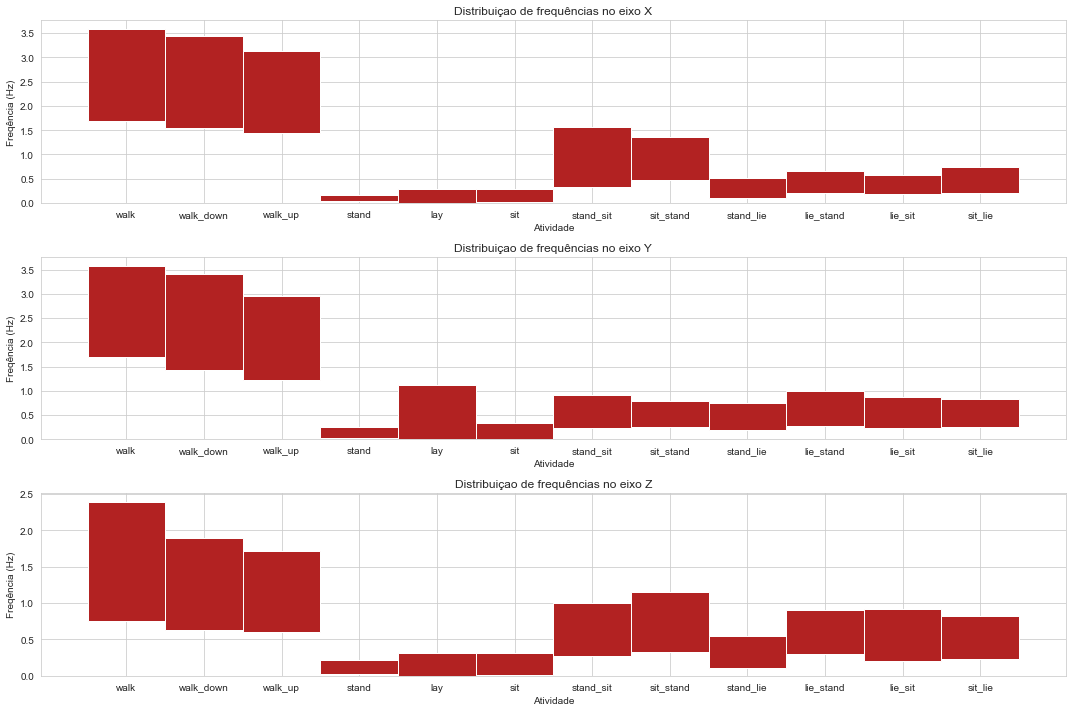

In [74]:
labels = []

for i in range(len(atividades['Z'])):
    labels.append((atividades['Z'].index)[i])

fig = plt.figure(figsize=(15,10))
width = 1

plt.subplot(311)
lower = []
upper = []
eixo = 'X'
for i in labels:
    lower.append(atividades[eixo][i][0])
    upper.append(atividades[eixo][i][1])

plt.bar(labels, lower, width, alpha = 0, align = 'center')
plt.bar(labels, upper, width, bottom = lower, color = 'firebrick',  align = 'center')
plt.xlabel('Atividade')
plt.ylabel('Freqência (Hz)')
plt.title(f'Distribuiçao de frequências no eixo {eixo}')

plt.subplot(312)
lower = []
upper = []
eixo = 'Y'
for i in labels:
    lower.append(atividades[eixo][i][0])
    upper.append(atividades[eixo][i][1])

plt.bar(labels, lower, width, alpha = 0, align = 'center')
plt.bar(labels, upper, width, bottom = lower, color = 'firebrick',  align = 'center')
plt.xlabel('Atividade')
plt.ylabel('Freqência (Hz)')
plt.title(f'Distribuiçao de frequências no eixo {eixo}')


plt.subplot(313)
lower = []
upper = []
eixo = 'Z'
for i in labels:
    lower.append(atividades[eixo][i][0])
    upper.append(atividades[eixo][i][1])

plt.bar(labels, lower, width, alpha = 0, align = 'center')
plt.bar(labels, upper, width, bottom = lower, color = 'firebrick',  align = 'center')
plt.xlabel('Atividade')
plt.ylabel('Freqência (Hz)')
plt.title(f'Distribuiçao de frequências no eixo {eixo}')

fig.tight_layout()
plt.show()

A seguinte célula tem como objetivo visualizar, de forma interativa(alterando o valor do i), as várias janelas da STFT, i.e, a janela no sinal original e os vários valores extraidos dessa janela: frequência máxima, amplitude e variação na média móvel. 

In [ ]:
unow = user1_1
size = 300
half = size//2
times, freqs, cms, var = stft(unow, size, 300)
times = np.append([0], times)
freqs = np.append([0], freqs)
cms = np.append([0], cms)
var = np.append([0], var)

t1 = times[::2]
t2 = times[1::2]

# i = numero da janela. Para visualizar uma janela em específico
i = 20

fig = plt.figure(figsize=(20,15))
plt.subplot(411)
plt.title('Frequências')
plt.plot(times, freqs, 'o', c = 'royalblue')
plt.axvspan(times[i], times[i+2], facecolor='g', alpha=0.5)
plt.vlines(t1, plt.ylim()[0] , plt.ylim()[1] , linestyle='dashed', color='red', lw = 0.6)
plt.vlines(t2, plt.ylim()[0] , plt.ylim()[1] , linestyle='dashed', color='blue', lw = 0.6)

plt.subplot(412)
plt.title('Amplitudes máximas')
plt.plot(times, cms, 'o', c = 'darkslategrey')
plt.axvspan(times[i], times[i+2], facecolor='g', alpha=0.5)
plt.vlines(t1, plt.ylim()[0] , plt.ylim()[1] , linestyle='dashed', color='red', lw = 0.6)
plt.vlines(t2, plt.ylim()[0] , plt.ylim()[1] , linestyle='dashed', color='blue', lw = 0.6)

plt.subplot(413)
plt.title('Variações na média móvel')
plt.plot(times, var, 'or')
plt.axvspan(times[i], times[i+2], facecolor='g', alpha=0.5)
plt.vlines(t1, plt.ylim()[0] , plt.ylim()[1] , linestyle='dashed', color='red', lw = 0.6)
plt.vlines(t2, plt.ylim()[0] , plt.ylim()[1] , linestyle='dashed', color='blue', lw = 0.6)

plt.subplot(414)
x_axis = np.arange(0, len(unow['Z']) * (1/50), (1/50)) / 60
plt.plot(x_axis, unow['Z'], 'k', lw = 0.7)
plt.vlines(t1, plt.ylim()[0] , plt.ylim()[1] , linestyle='dashed', color='red', lw = 0.6)
plt.vlines(t2, plt.ylim()[0] , plt.ylim()[1] , linestyle='dashed', color='blue', lw = 0.6)

a = int(times[i]*60*50)
b = int(times[i+2]*60*50)
plt.plot(x_axis[a:b], unow['Z'][a:b], 'g', lw = 1)
plt.axvspan(times[i], times[i+2], facecolor='g', alpha=0.5)

fig.tight_layout()

In [ ]:
cores = ['blue', 'olive', 'firebrick', 'black']
"""
blue = transição
olive = estática
firebrick = dinâmica
black = não identificado
"""
cores_to_plot = []
for i in range(1, len(freqs)):
    # se a variação na média móvel > x -> transição
    if var[i] > 0.1:
        if freqs[i] > 1.5 or np.round(cms[i], 2) > 0.01:
            #transição
            cores_to_plot.append(cores[0])

        elif np.round(cms[i], 2) <= 0.01:
            #estática
            cores_to_plot.append(cores[1])
        
        elif 0.5<=freqs[i]<=2:
        #elif <=freqs[i]<=2:
            #dinâmica
            cores_to_plot.append(cores[2])
            
        else:
            #não identificado
            cores_to_plot.append(cores[-1])
    
    else:
        if np.round(cms[i], 2) <= 0.01:
            #estática
            cores_to_plot.append(cores[1])
            
        elif 0.5<=freqs[i]<=2 and np.round(cms[i], 3) > 0.025:
            #dinâmica
            cores_to_plot.append(cores[2])
            
        else:
            #não identificado
            cores_to_plot.append(cores[-1])

### Validação gráfica dos métodos propostos anteriormente para distinguir os três tipos de atividades: estáticas, dinâmicas e de transição

In [ ]:
from matplotlib.lines import Line2D
array = [Line2D([0], [0], color='blue', lw=4), Line2D([0], [0], color='maroon', lw=4), Line2D([0], [0], color='olive', lw=4), Line2D([0], [0], color='black', lw=4)]

plt.figure(figsize = (16,4))
j=0
for i in range(0, len(unow) - size + 1, half):
    plt.plot(unow['Time (min)'][i:i+size], unow['Z'][i:i+size], c = cores_to_plot[j], lw=0.5)
    j+=1

plt.legend(array, ['Transição', 'Dinâmica', 'Estática', 'Não indentificado'])

plt.tight_layout()
plt.show()

# Conclusão
Os resultados obtidos, apesar de não serem maus, poderiam ser melhores. Para isso seria necessário comparar mais informação, de modo a conseguir generalizar melhor os dados. A previsão de atividades com uso de apenas um eixo, é bastante limitada<br>
Apesar de termos apenas previsto tipos de atividades, verificámos diferenças entre as próprias atividades dinâmicas, como por exemplo a atividade <i>Walk_Downstairs</i> têm amplitudes superiores nas acelerações recebidas no eixo X, enquanto que a atividade <i>Walk_Upstairs</i> tem uma frequência menor nas acelerações do eixo Z. <br>
Pelos dados avaliados, que não são muitos, pelo que é complicado uma generalização, mas também há uma semelhança nas atividades estáticas, que são os intervalos das acelerações recebidas nos eixos Y. Estas são as unicas que se mantêm similares entre todas as experiências<br><br>

# <center>|--------- FIM ---------|</center>